## Importing the Libraries

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import PrecisionRecallDisplay
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

c:\Users\Samu\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data Exploration

In [228]:
#Reading the dataset
data = pd.read_csv('files\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [229]:
#Checking the shape of the dataset
print(data.shape)

(1470, 35)


In [230]:
#Checking the data types of the columns
print(data.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [231]:
#Getting the information of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [232]:
#Checking the first few rows of the dataset
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [233]:
#Getting the summary of the dataset
data.describe().transpose()

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [234]:
#Getting the count of missing values in the dataset
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [235]:
#Checking the dataset for duplicates
print('Number of duplicates: ', data.duplicated().sum())

0


In [236]:
#Checking the unique values in the dataset
print(data.nunique())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [237]:
#Converting the column EmployeeNumber to the index, as it is a unique identifier
data.set_index('EmployeeNumber', inplace=True)

In [238]:
#Getting the unique values for each column
for col in data.columns:
    print(col, data[col].unique())

Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

## Data Visualization

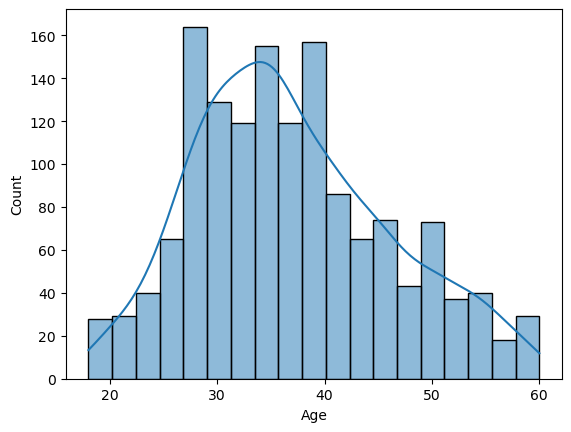

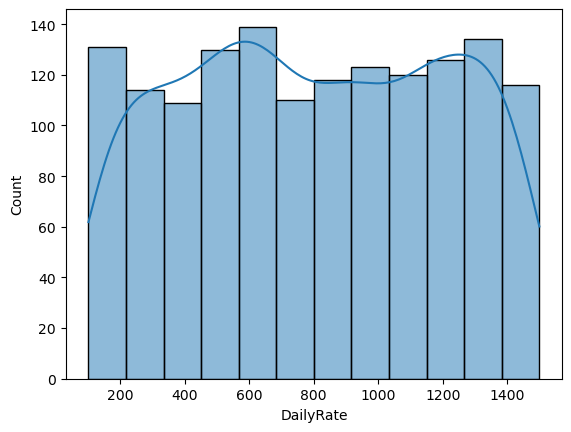

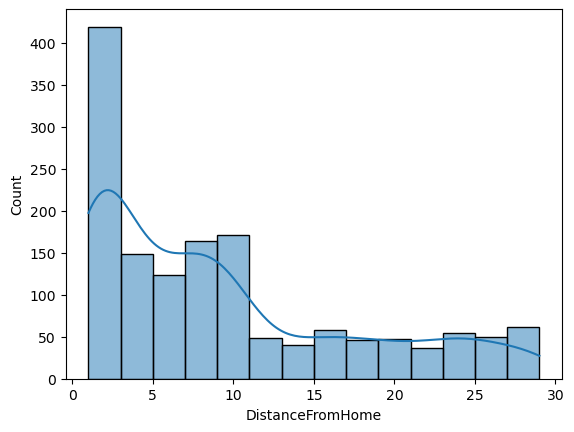

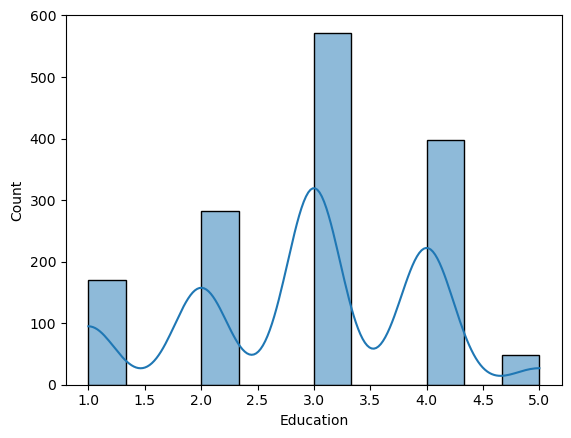

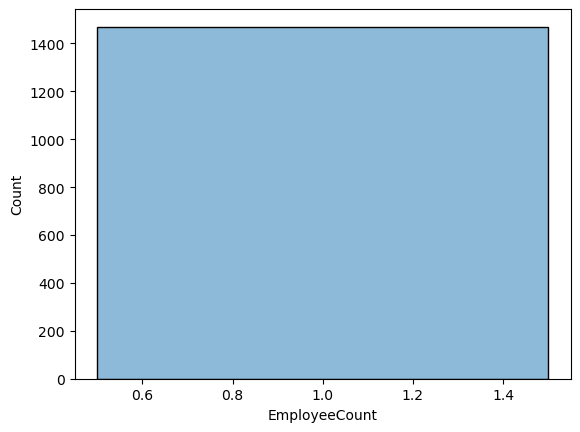

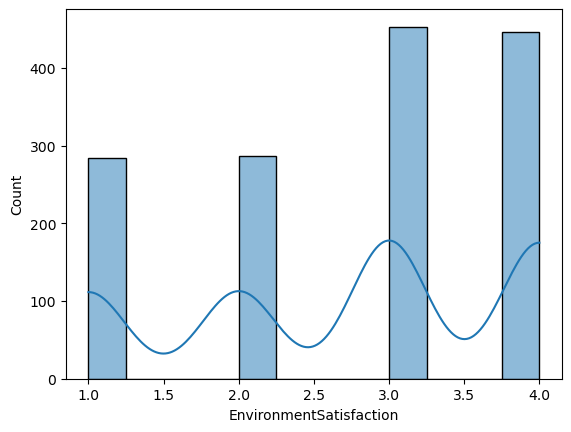

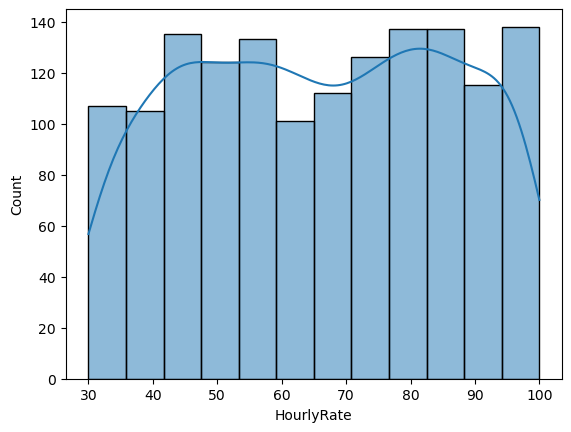

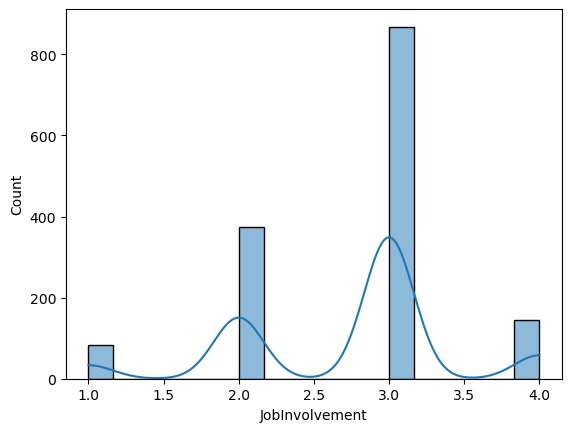

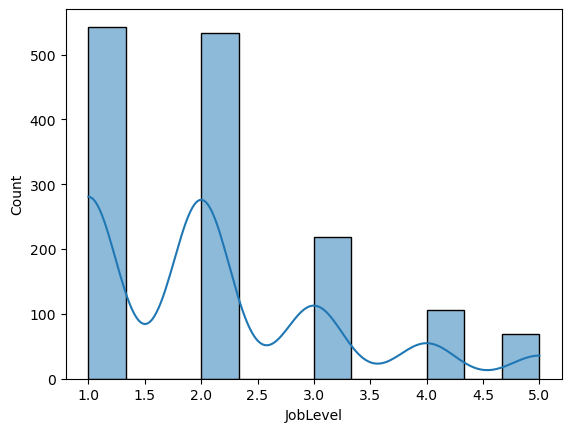

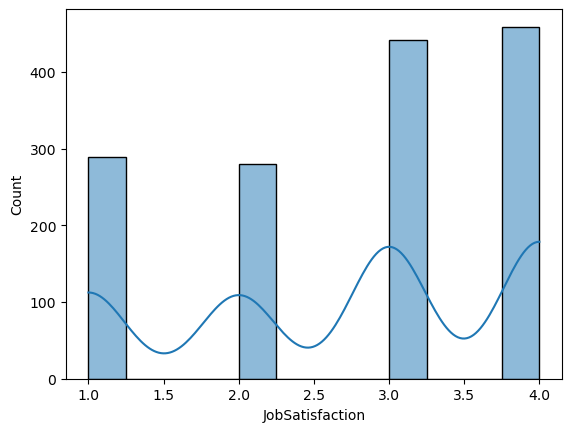

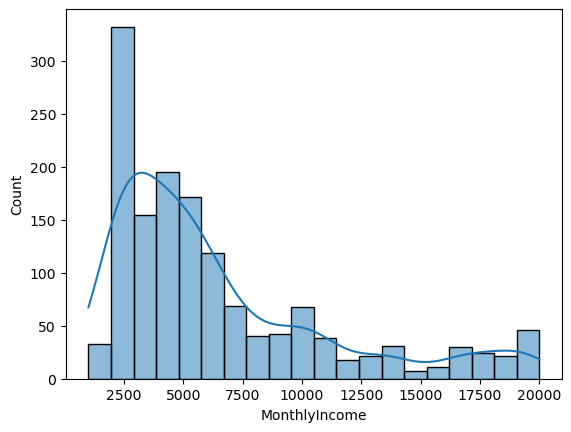

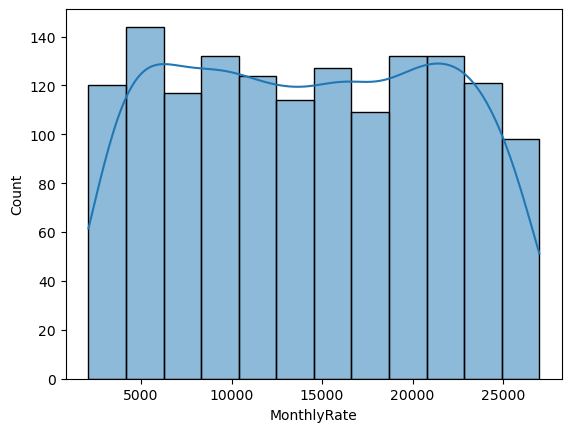

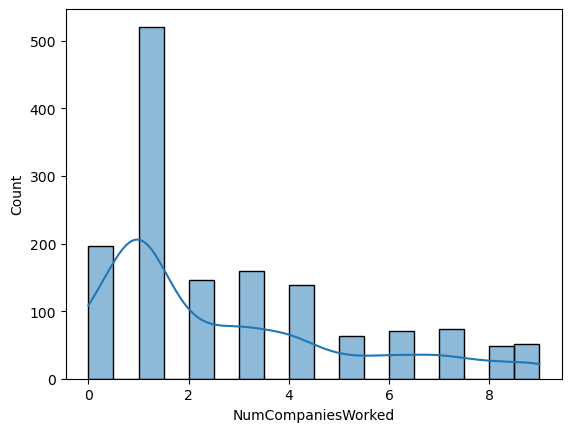

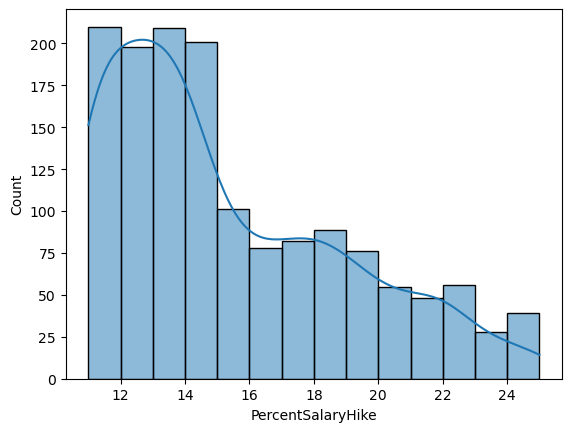

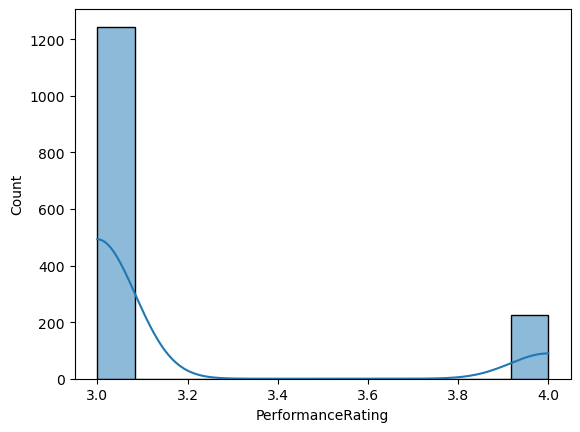

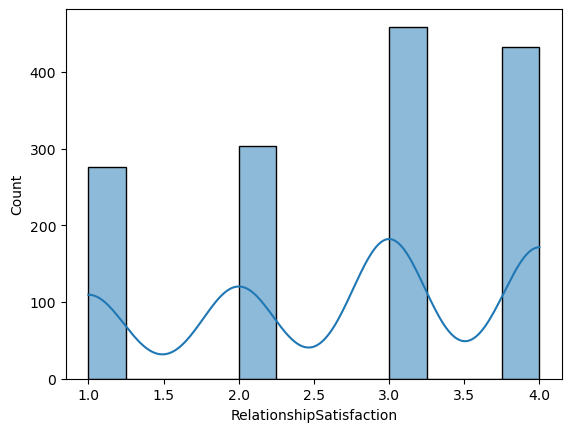

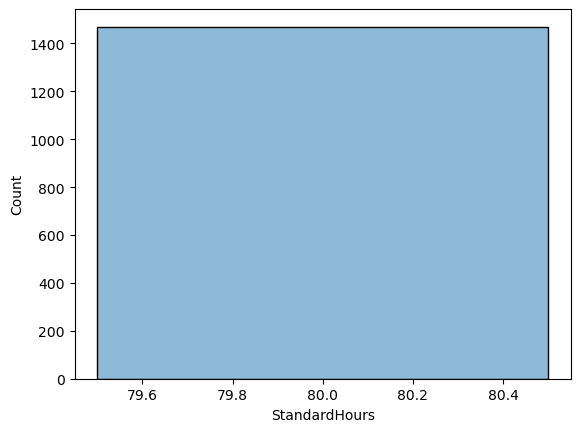

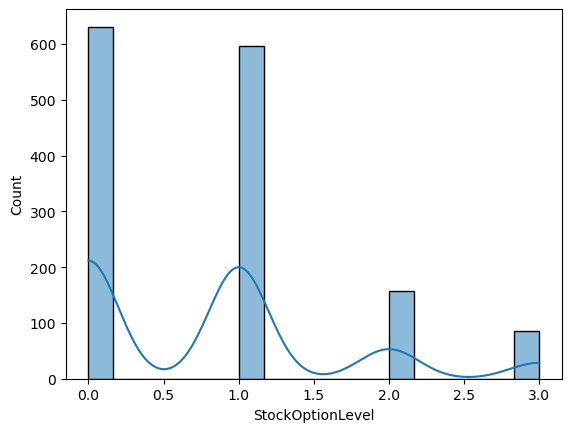

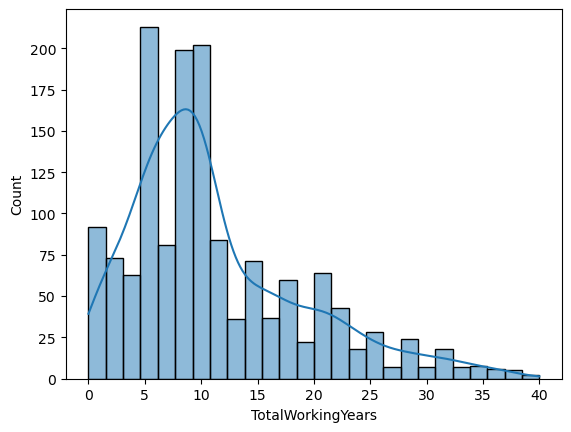

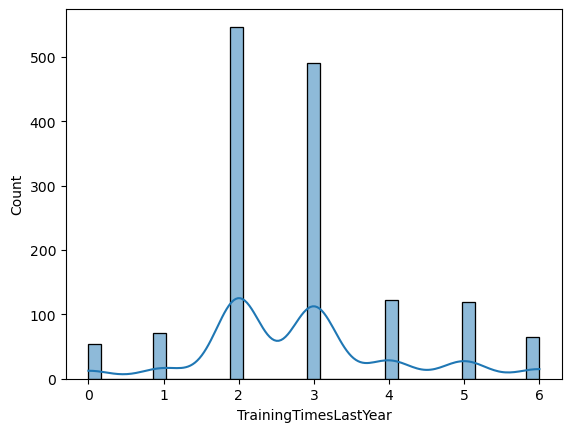

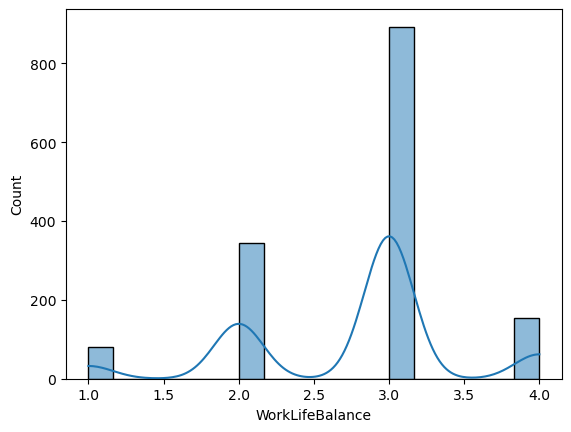

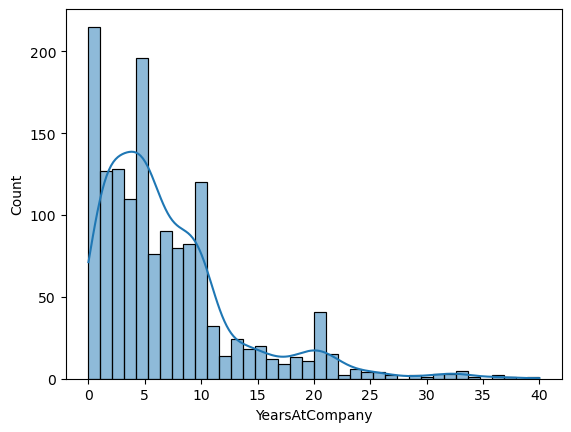

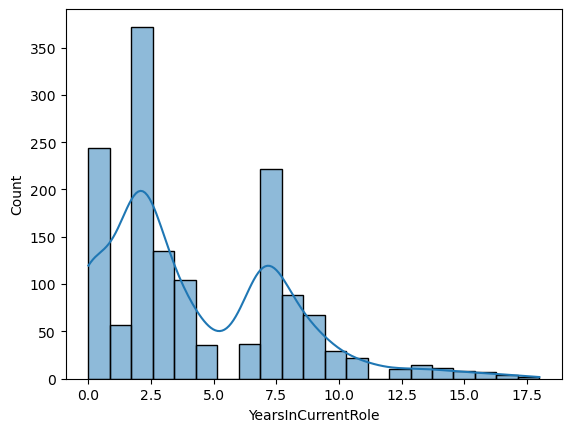

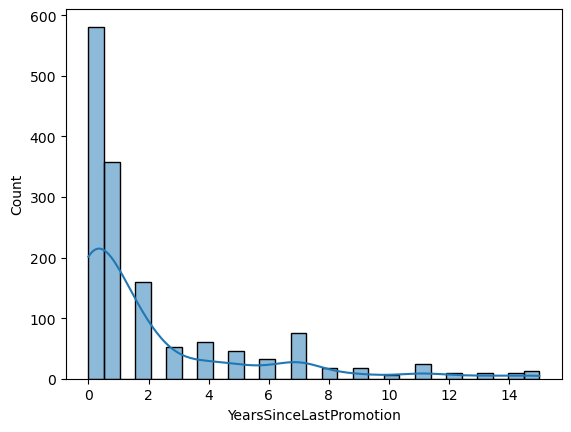

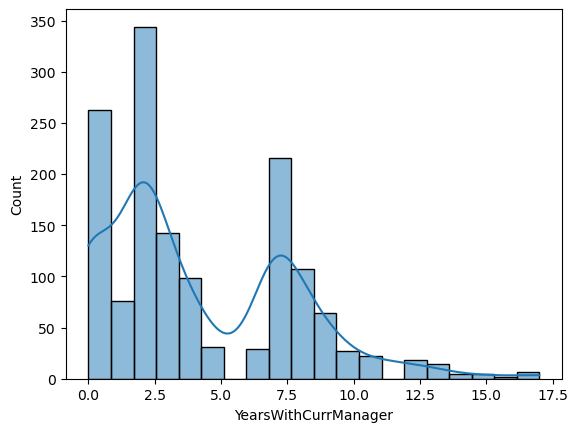

In [239]:
#Plotting the distribution of the numerical columns
for col in data.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(data[col], kde=True)

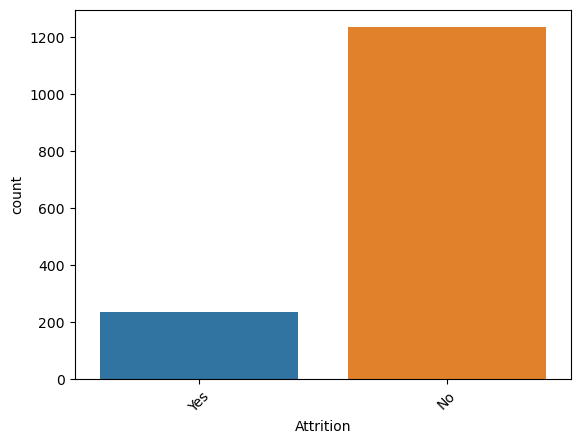

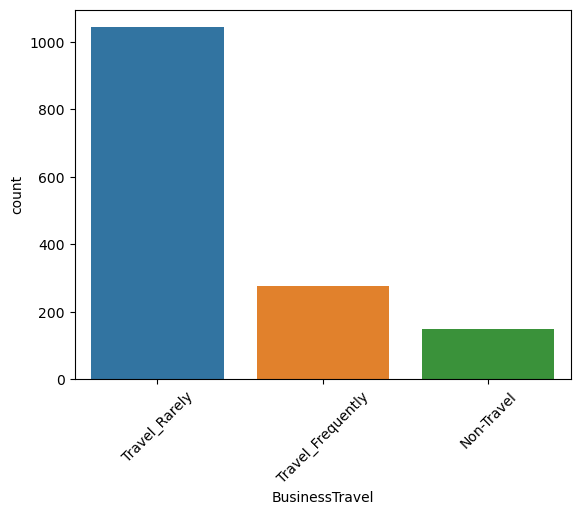

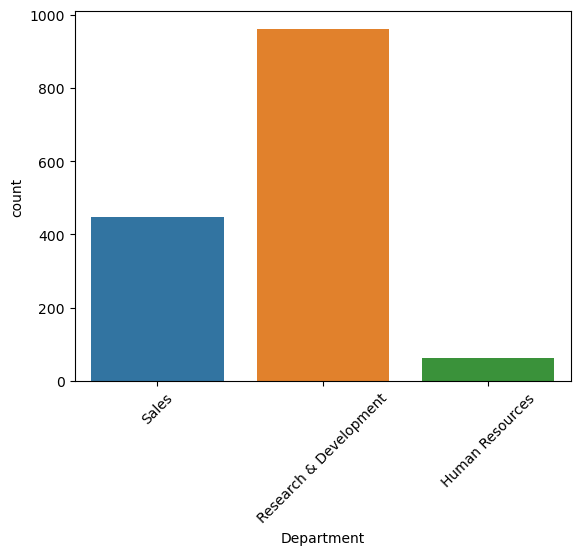

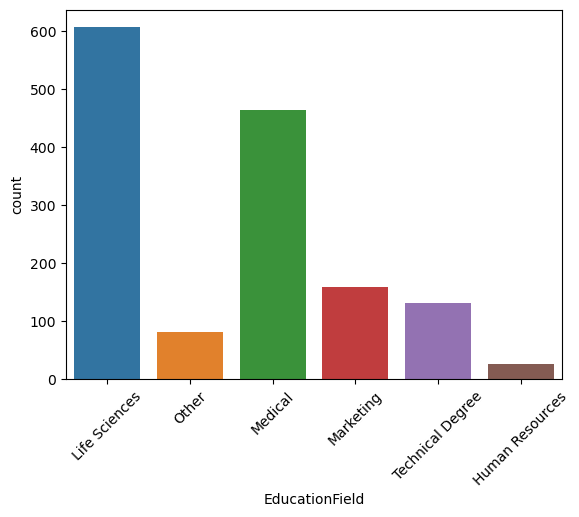

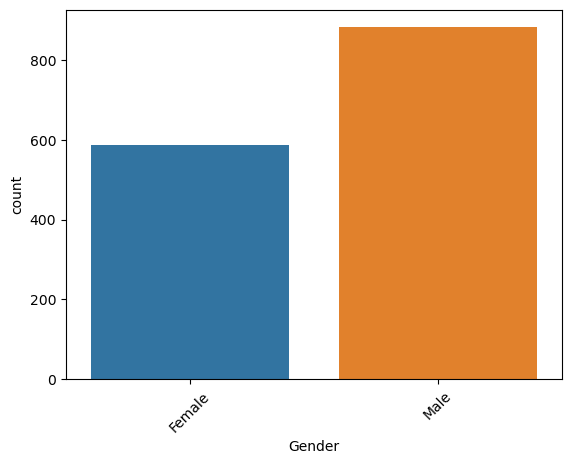

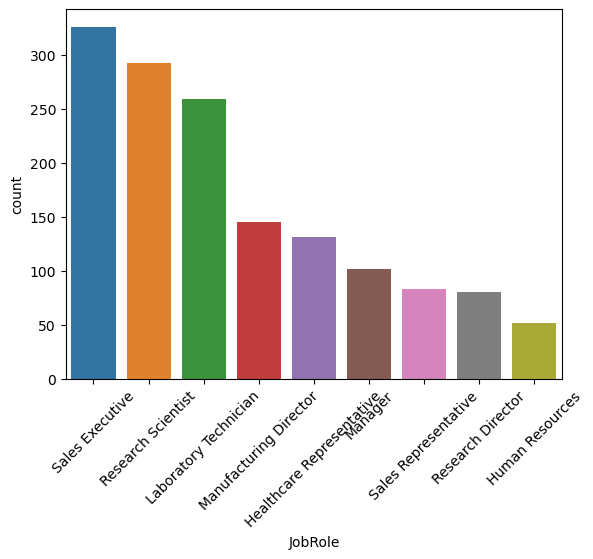

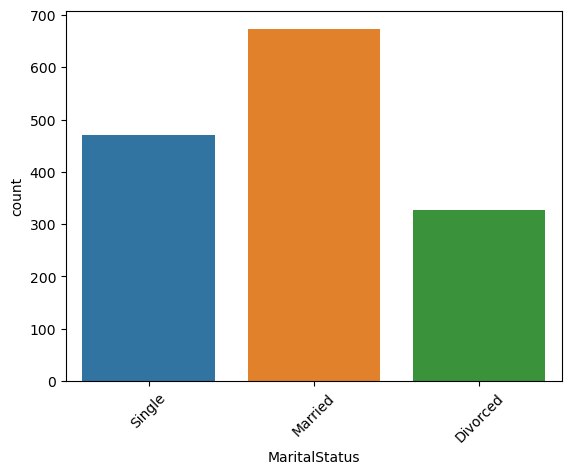

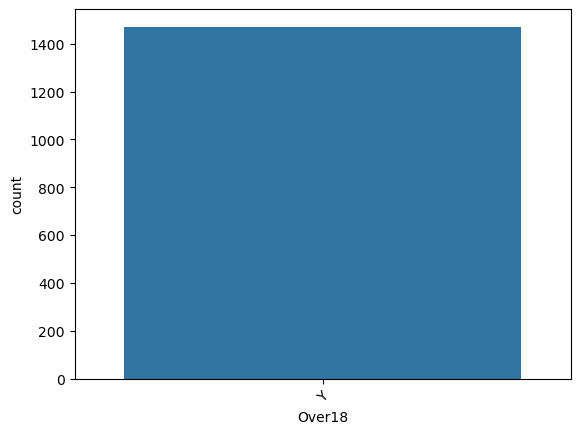

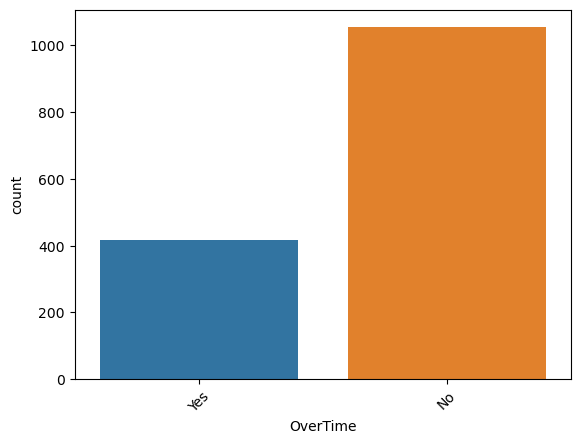

In [240]:
#Plotting the categorical columns
for col in data.select_dtypes(include=object).columns:
    plt.figure()
    plt.xticks(rotation=45)
    sns.countplot(data=data, x=col)

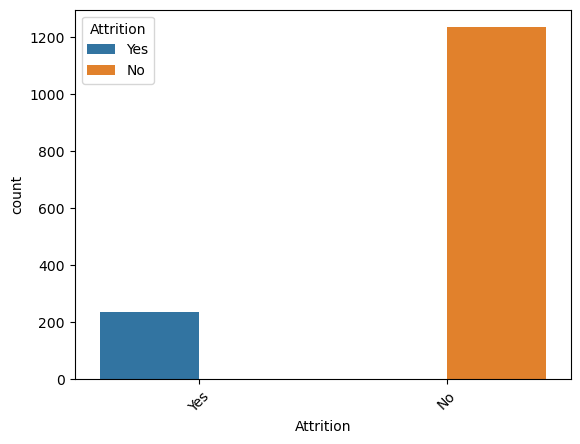

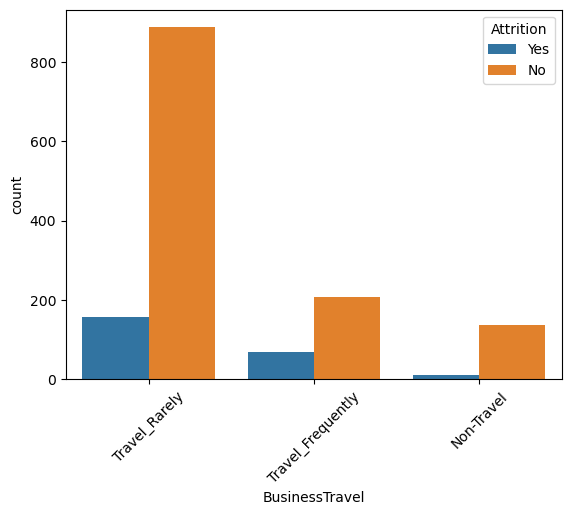

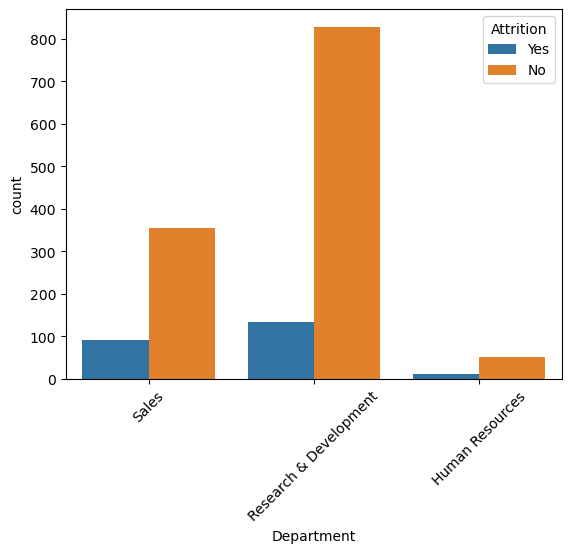

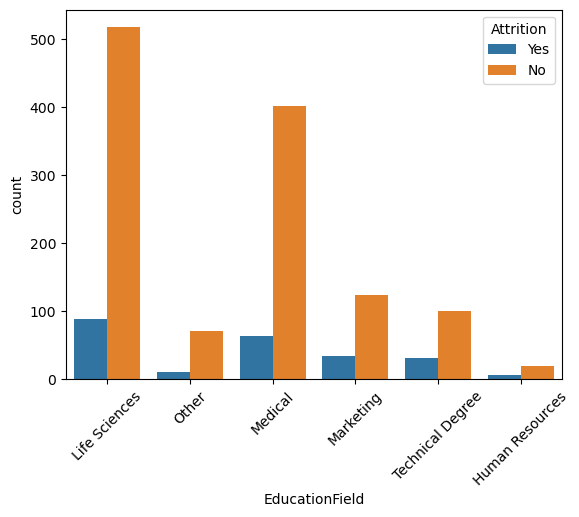

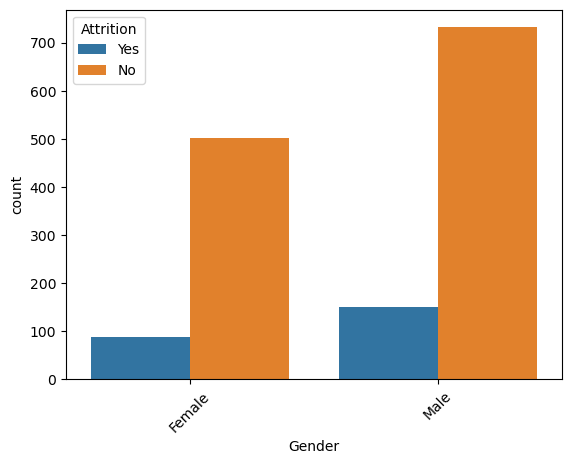

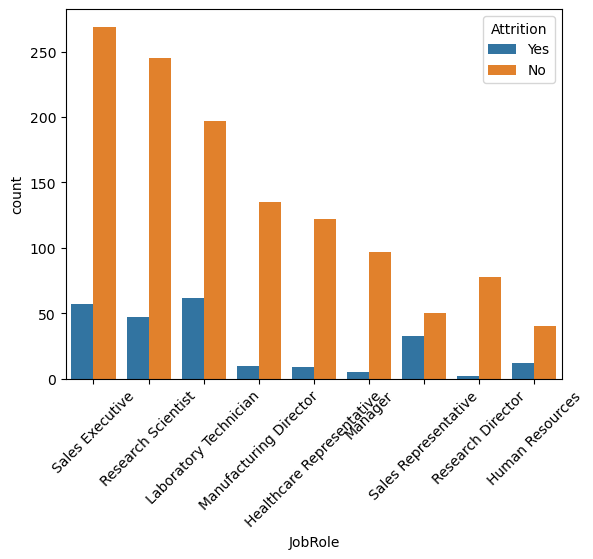

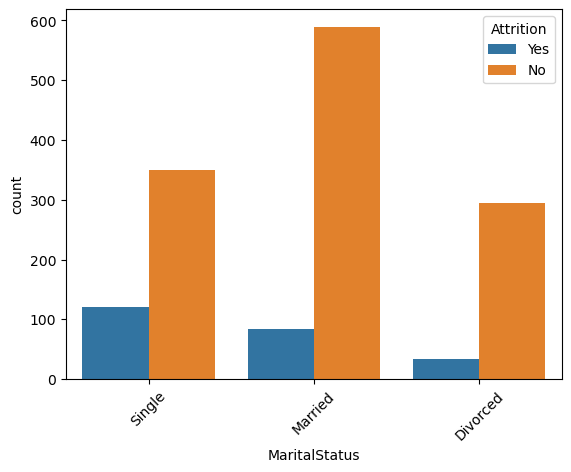

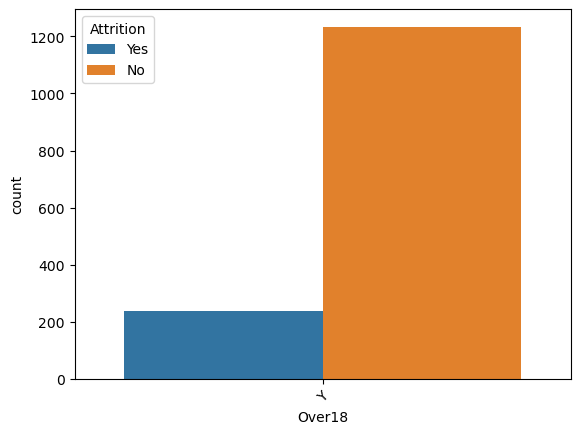

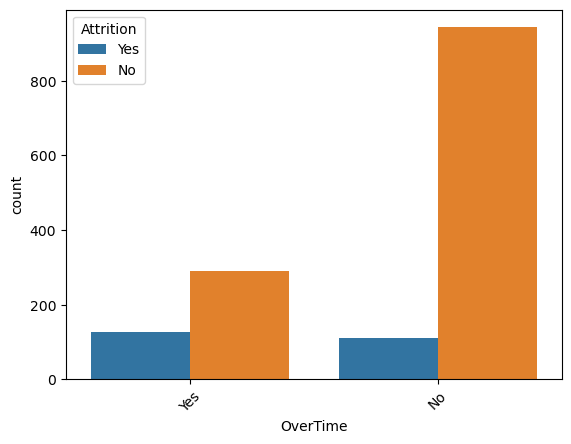

In [241]:
#Plotting the categorical columns with respect to the target column
for col in data.select_dtypes(include=object).columns:
    plt.figure()
    plt.xticks(rotation=45)
    sns.countplot(data=data, x=col, hue='Attrition')

We can see a clear imbalance between the target, Attrition, as we have more No than Yes, we will adress that imbalance later.

We can also see some columns that will not help much, as Over18, as all employees are Over 18, StandardHours, as every employee has 80 and EmployeeCount, as all the values are 1. We will drop those columns directly.

From the information gathered in this first step, we can also say with confidence that the best way to deal with the categorical columns is to use label encoding, as all the values in each categorical column have relationships. We can use LabelEncoder to do that automatically, but, with the little amount of categorical values, we can do it by hand, that way we can ensure a good encoding and we will have a guide to go back and check what value represents what.

From the plots, we can start to see which features impact more on the attrition of the employees, but will use a model with feature importancde to select them.

In [242]:
#Drop the columns that are not required
data.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'], inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '31'),
  Text(25, 0, '32'),
  Text(26, 0, '33'),
  Text(27, 0, '40')])

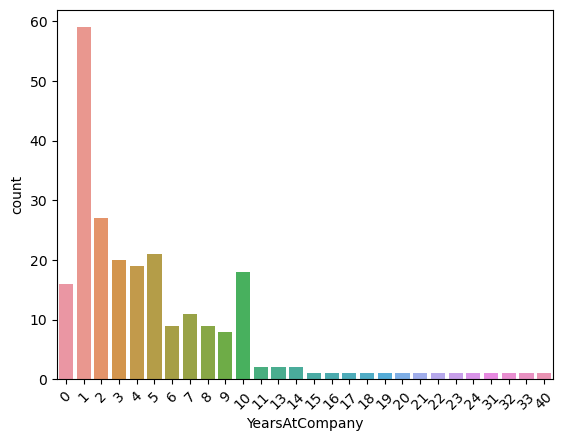

In [243]:
#Filtering the data for employees with attrition, to get more accurate insights
yes_attrition = data[data['Attrition'] == 'Yes']

#Plotting the years at company for employees with attrition
plt.figure()
sns.countplot(data=yes_attrition, x='YearsAtCompany')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15')])

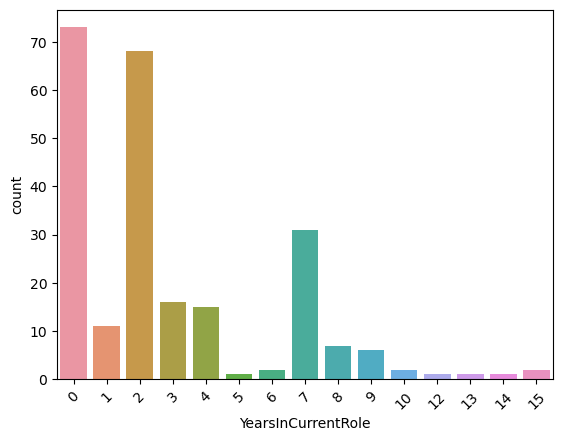

In [244]:
#Plotting the years in current role for employees with attrition
plt.figure()
sns.countplot(data=yes_attrition, x='YearsInCurrentRole')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

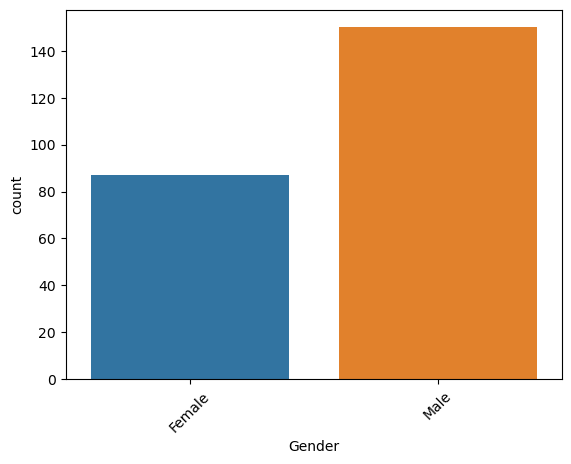

In [245]:
#Plotting the gender of employees with attrition
plt.figure()
sns.countplot(data=yes_attrition, x='Gender')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Healthcare Representative'),
  Text(7, 0, 'Manufacturing Director'),
  Text(8, 0, 'Manager')])

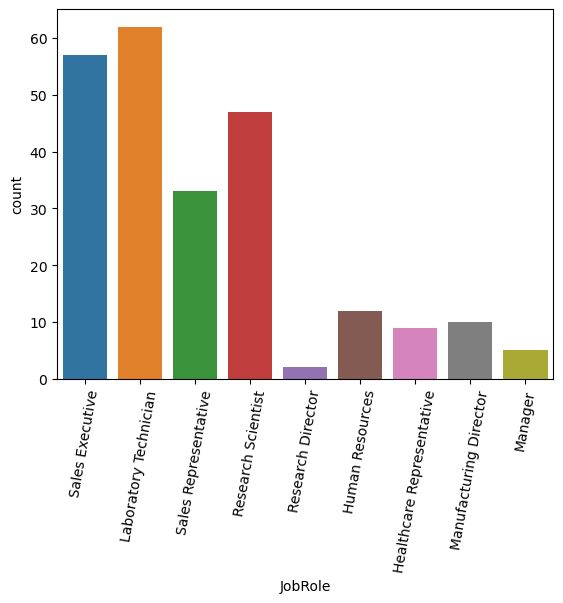

In [246]:
#Plotting the job role of employees with attrition
plt.figure()
sns.countplot(data=yes_attrition, x='JobRole')
plt.xticks(rotation=80)

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000'),
  Text(22500.0, 0, '22500')])

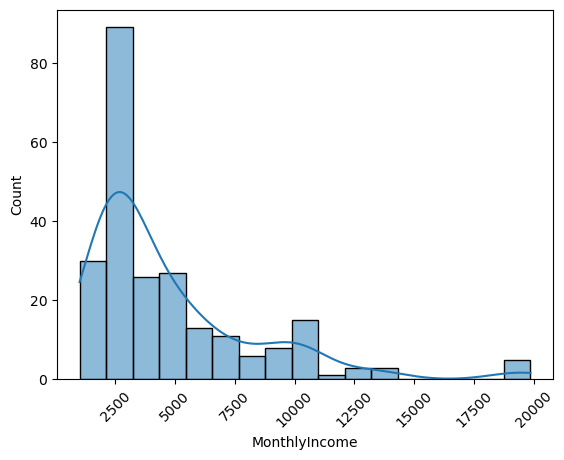

In [247]:
#Plotting the monthly income of employees with attrition
plt.figure()
sns.histplot(data=yes_attrition['MonthlyIncome'], kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Healthcare Representative'),
  Text(7, 0, 'Manufacturing Director'),
  Text(8, 0, 'Manager')])

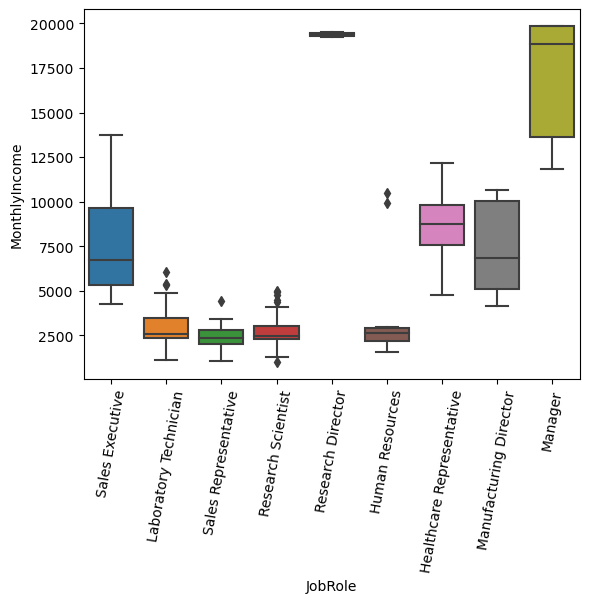

In [248]:
#Plottting the relationship between the monthly income and the job role of employees with attrition
plt.figure()
sns.boxplot(data=yes_attrition, x='JobRole', y='MonthlyIncome')
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Healthcare Representative'),
  Text(7, 0, 'Manufacturing Director'),
  Text(8, 0, 'Manager')])

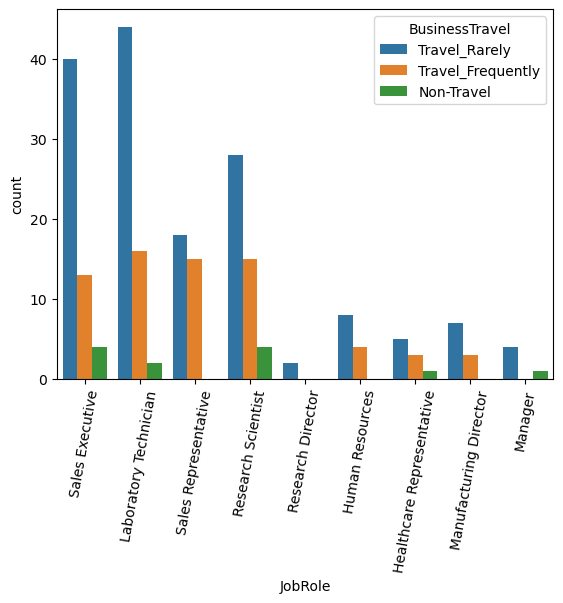

In [249]:
#Plotting the relationship between the travel frequency and the job role of employees with attrition
plt.figure()
sns.countplot(data=yes_attrition, x='JobRole', hue='BusinessTravel')
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Healthcare Representative'),
  Text(7, 0, 'Manufacturing Director'),
  Text(8, 0, 'Manager')])

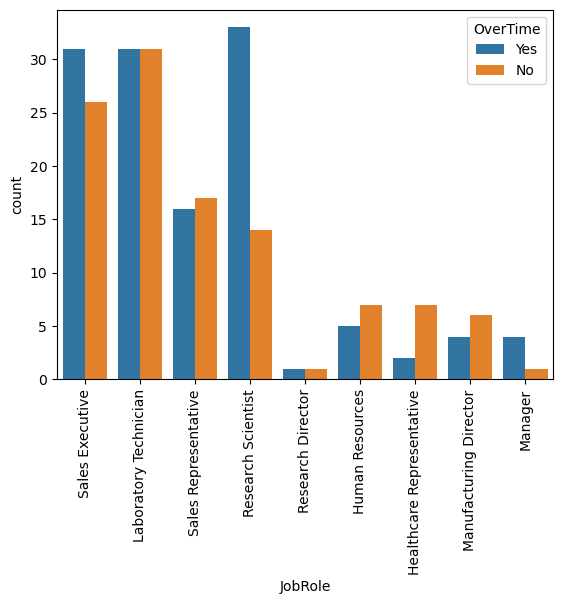

In [250]:
#Plotting the relationship between the job role and the overtime of employees with attrition
plt.figure()
sns.countplot(data=yes_attrition, x='JobRole', hue='OverTime')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Healthcare Representative'),
  Text(7, 0, 'Manufacturing Director'),
  Text(8, 0, 'Manager')])

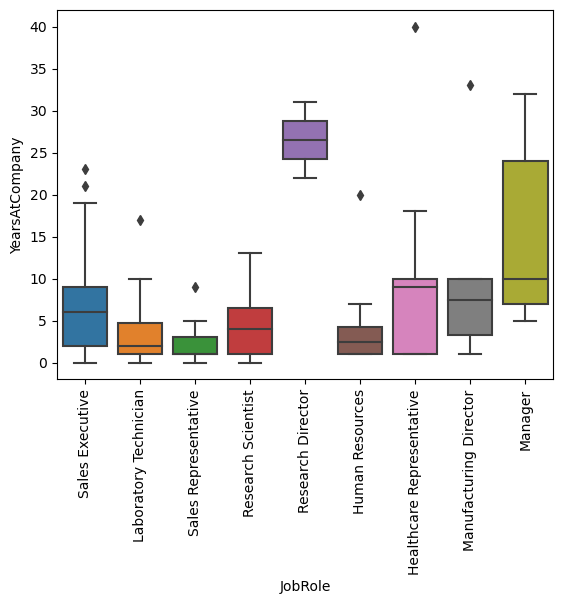

In [251]:
#Plotting the relationship between the job role and the years at company of employees with attrition
plt.figure()
sns.boxplot(data=yes_attrition, x='JobRole', y='YearsAtCompany')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Laboratory Technician'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Research Scientist'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Healthcare Representative'),
  Text(7, 0, 'Manufacturing Director'),
  Text(8, 0, 'Manager')])

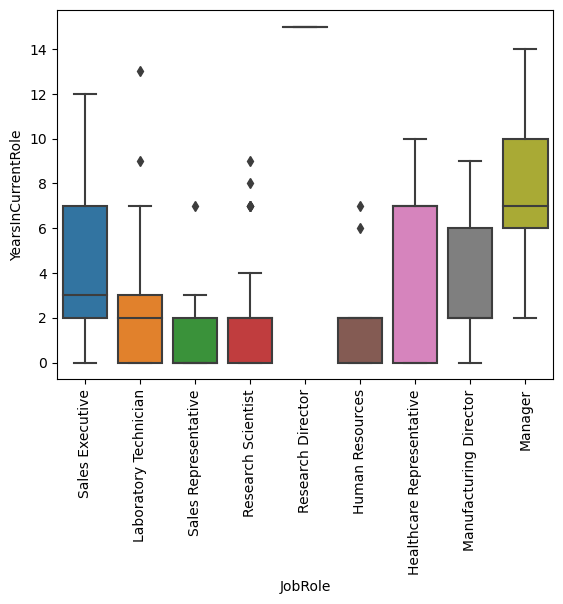

In [252]:
#Plotting the relationship between the job role and the years in current role of employees with attrition
plt.figure()
sns.boxplot(data=yes_attrition, x='JobRole', y='YearsInCurrentRole')
plt.xticks(rotation=90)


## Data Preprocesing

In [253]:
#Separating categorical and numerical columns
cat_cols = data.select_dtypes(include=object)
cat_cols = pd.concat([cat_cols, data[['Education', 'EnvironmentSatisfaction', 'JobLevel', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']]], axis=1)
#Adding the columns that are not in the categorical columns to the numerical columns
num_cols = data.drop(columns=cat_cols.columns)

#Encoding the categorical columns
#Creating a dictionary for the column Gender
gender_dict = {'Male': 0, 'Female': 1}
cat_cols['Gender'] = cat_cols['Gender'].map(gender_dict)

#Creating a dictionary for the column BusinessTravel
business_travel_dict = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
cat_cols['BusinessTravel'] = cat_cols['BusinessTravel'].map(business_travel_dict)

#Creating a dictionary for the column Department
department_dict = {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}
cat_cols['Department'] = cat_cols['Department'].map(department_dict)

#Creating a dictionary for the column EducationField
education_field_dict = {'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5}
cat_cols['EducationField'] = cat_cols['EducationField'].map(education_field_dict)

#Creating a dictionary for the column JobRole
job_role_dict = {'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}
cat_cols['JobRole'] = cat_cols['JobRole'].map(job_role_dict)

#Creating a dictionary for the column MaritalStatus
marital_status_dict = {'Single': 0, 'Married': 1, 'Divorced': 2}
cat_cols['MaritalStatus'] = cat_cols['MaritalStatus'].map(marital_status_dict)

#Creating a dictionary for the column Overtime
overtime_dict = {'No': 0, 'Yes': 1}
cat_cols['OverTime'] = cat_cols['OverTime'].map(overtime_dict)

#Creating a dictionary for the target column Attrition
attrition_dict = {'No': 0, 'Yes': 1}
cat_cols['Attrition'] = cat_cols['Attrition'].map(attrition_dict)

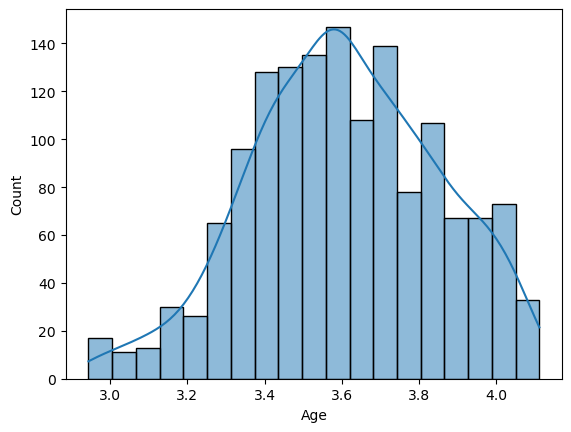

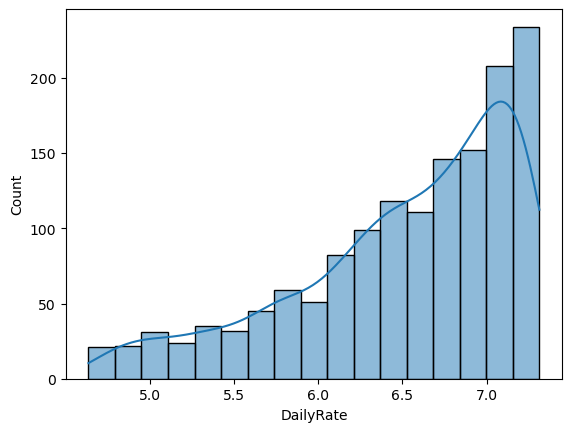

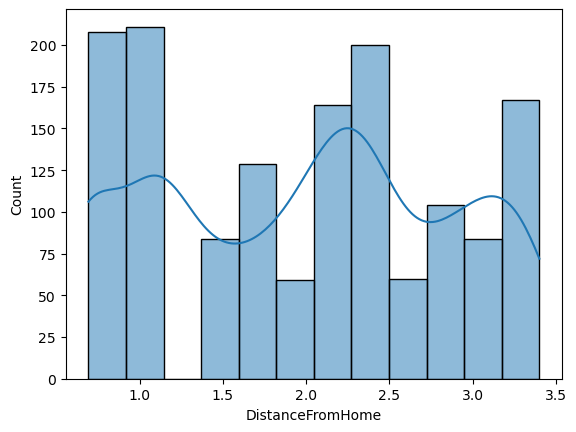

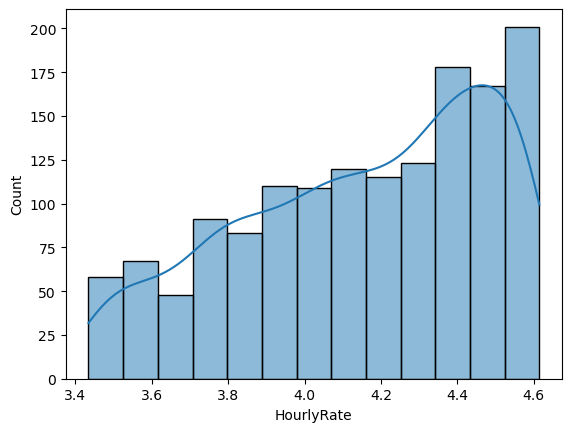

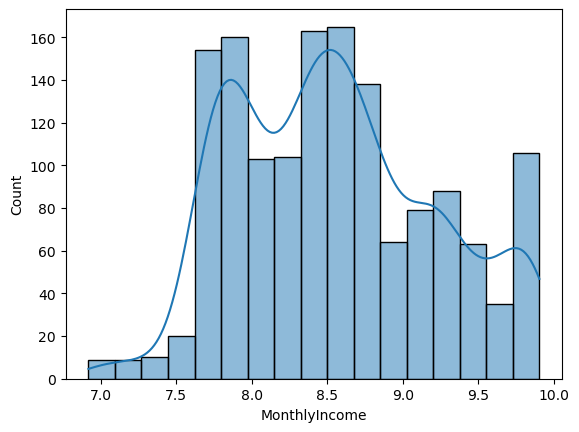

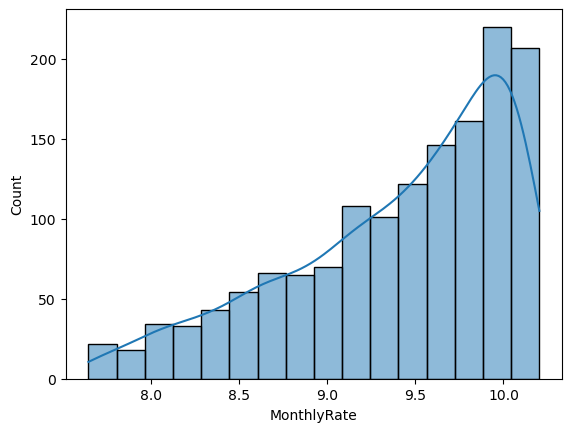

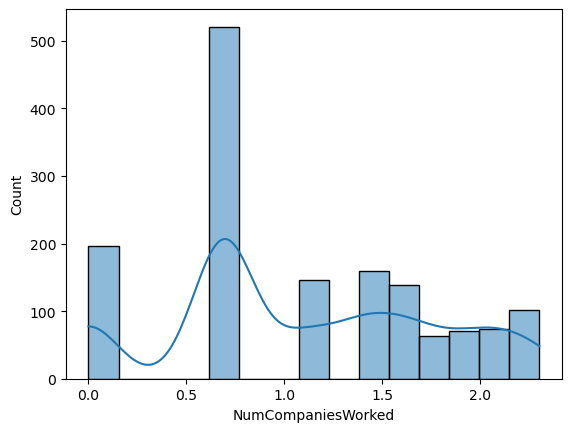

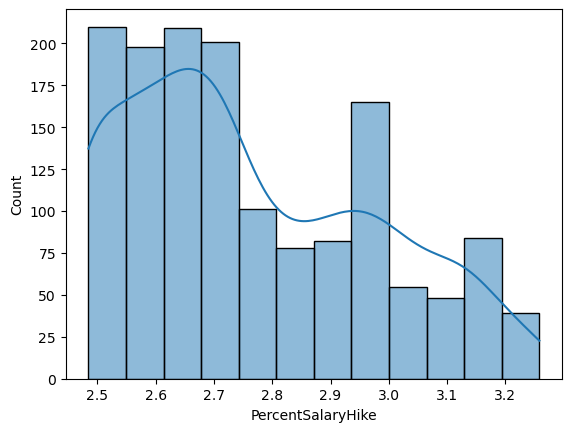

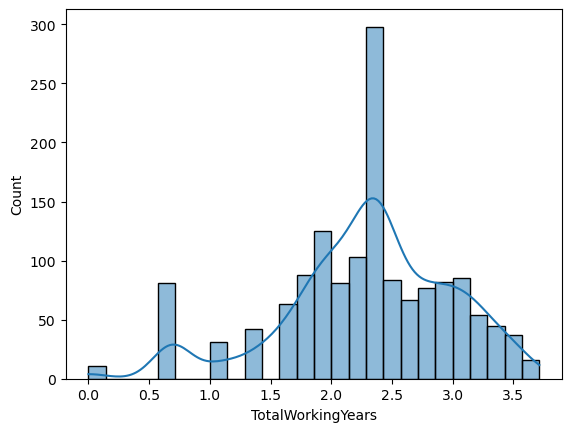

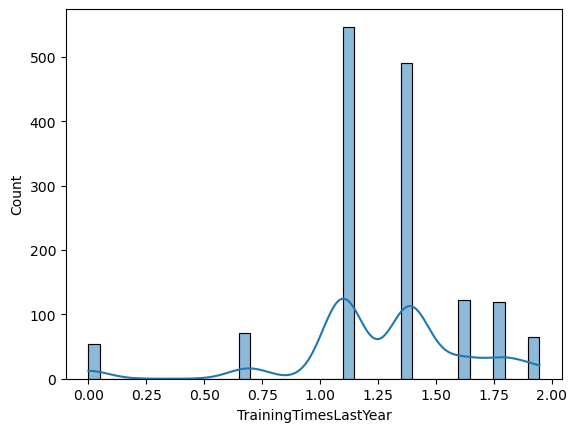

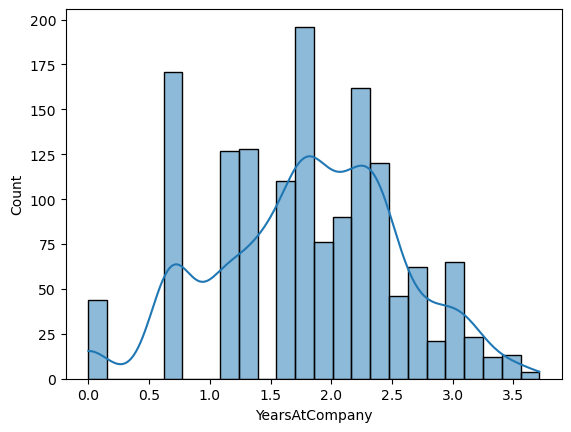

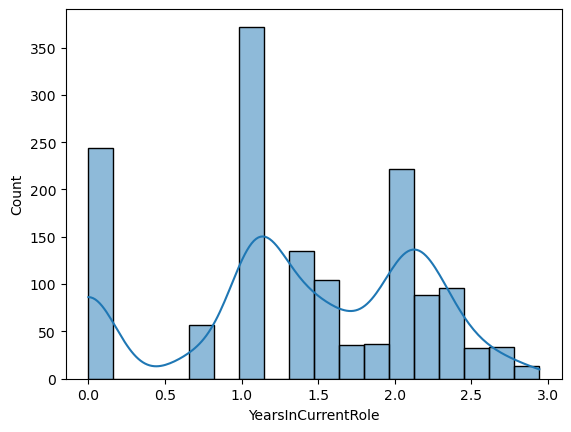

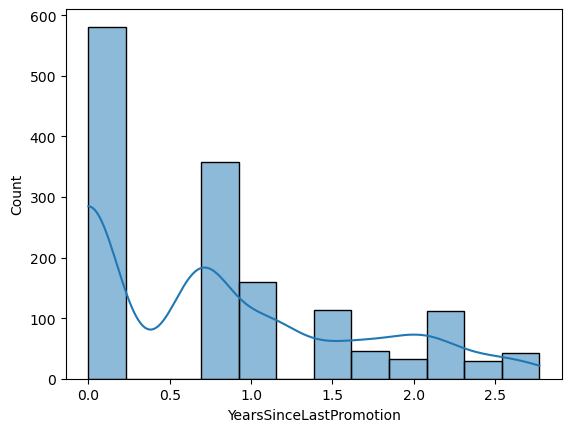

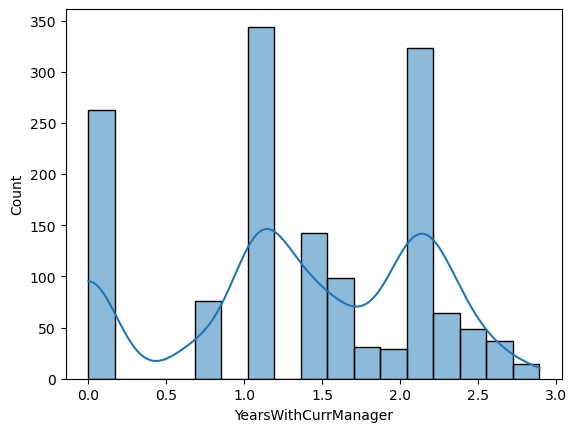

In [254]:
#Testing different scaler for the numerical columns
from sklearn.preprocessing import StandardScaler, PowerTransformer

#Creating a copy of the data
log_data = num_cols.copy()
standard_data = num_cols.copy()
power_data = num_cols.copy()

#Applying the log transformation to the numerical columns
for col in log_data.columns:
    log_data[col] = np.log1p(log_data[col])

#Plottting the distribution of the numerical columns after applying the log transformation
for col in log_data.columns:
    plt.figure()
    sns.histplot(data=log_data[col], kde=True)

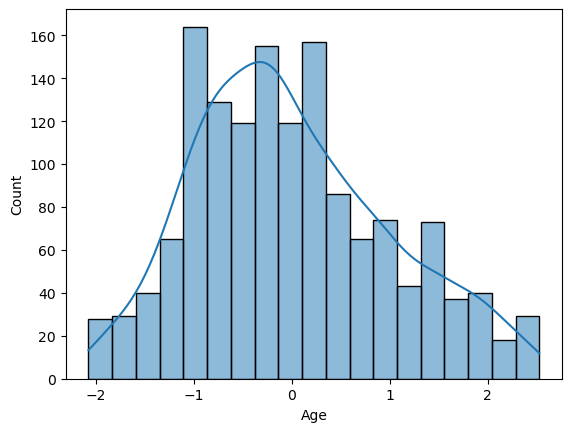

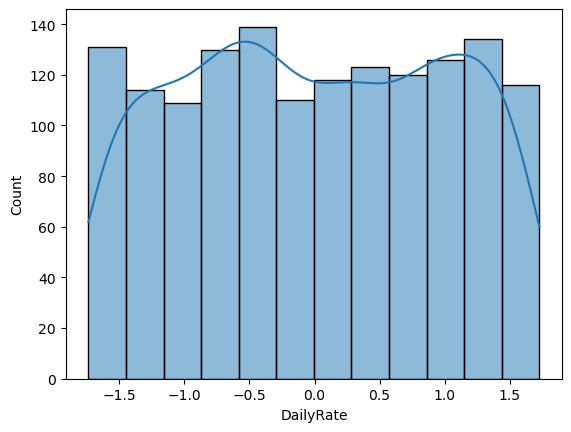

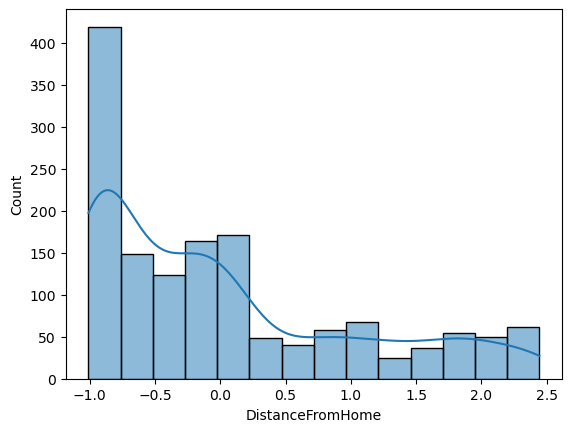

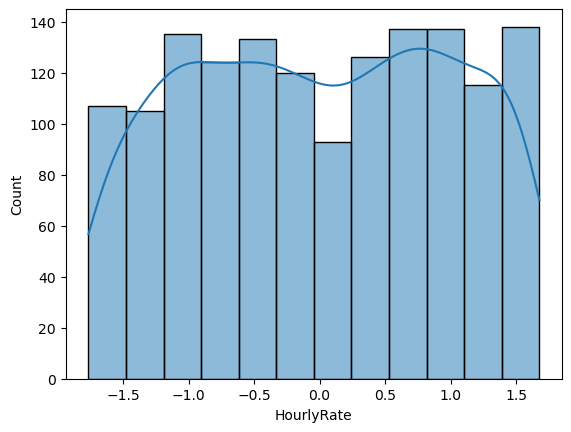

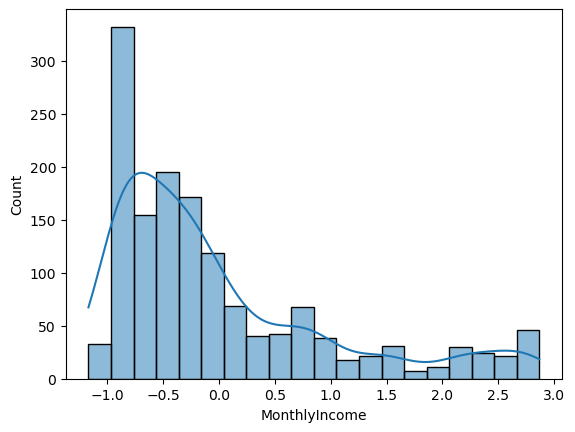

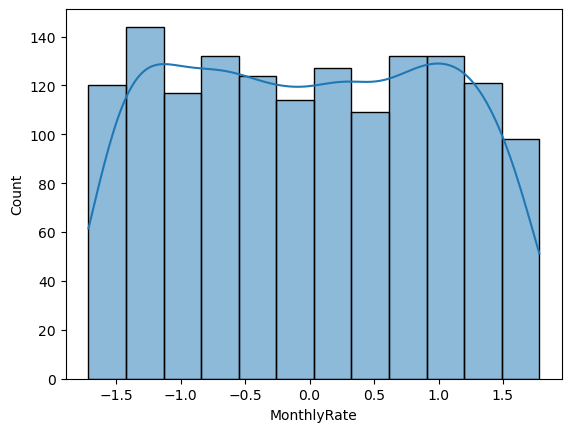

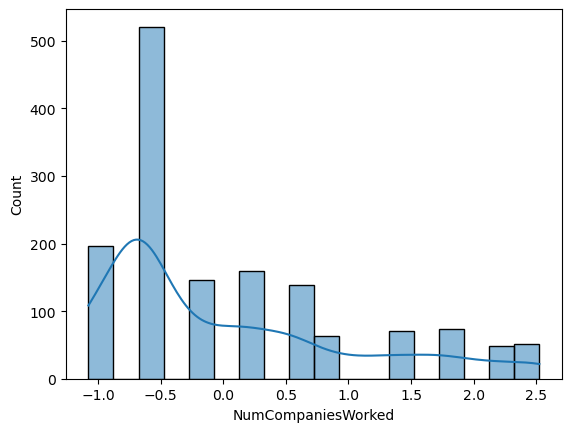

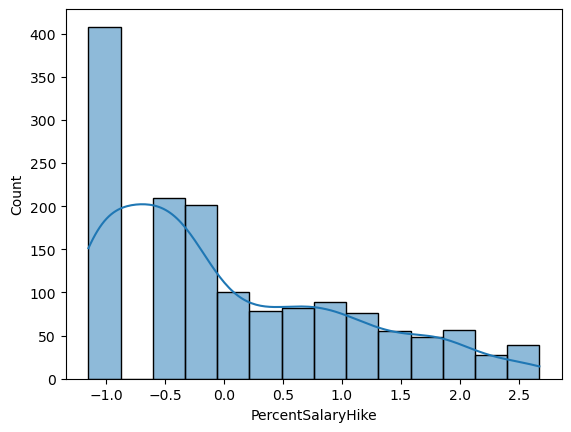

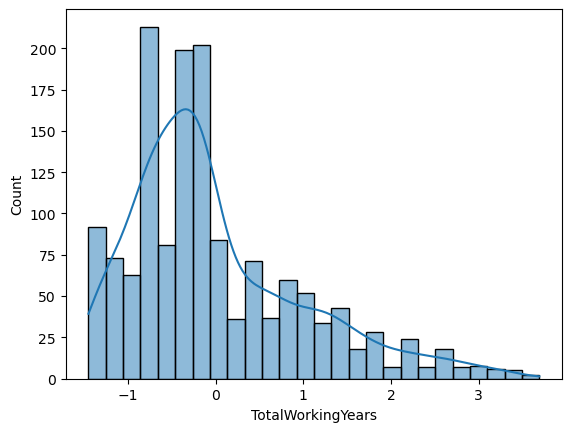

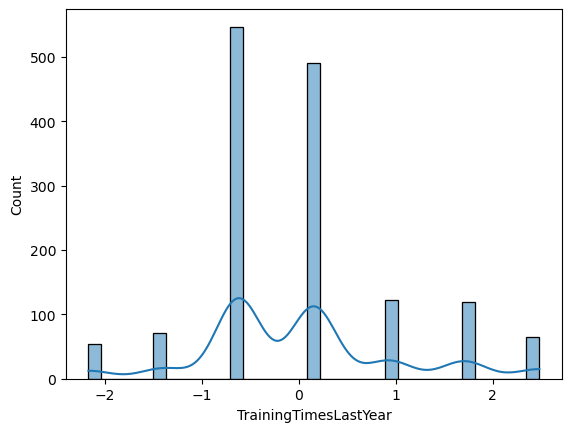

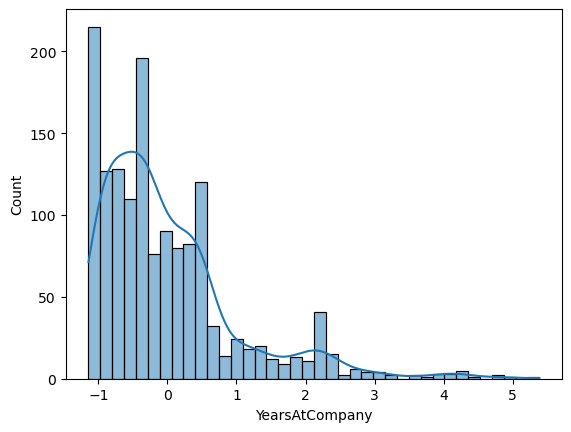

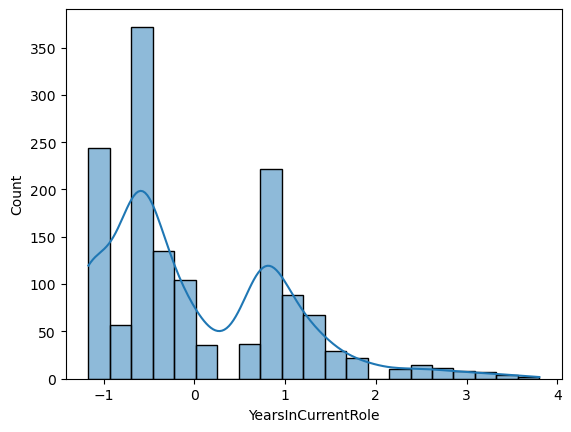

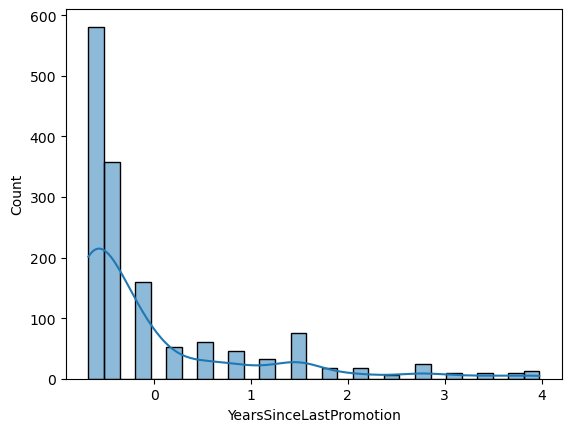

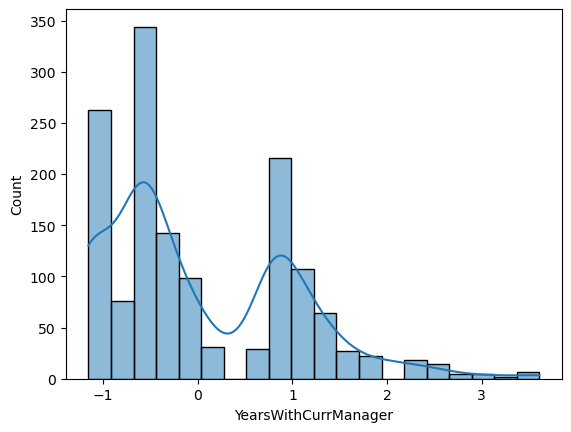

In [255]:
#Applying the standard scaler to the numerical columns
scaler = StandardScaler()
standard_data[standard_data.columns] = scaler.fit_transform(standard_data[standard_data.columns])

#Plottting the distribution of the numerical columns after applying the standard scaler
for col in standard_data.columns:
    plt.figure()
    sns.histplot(data=standard_data[col], kde=True)

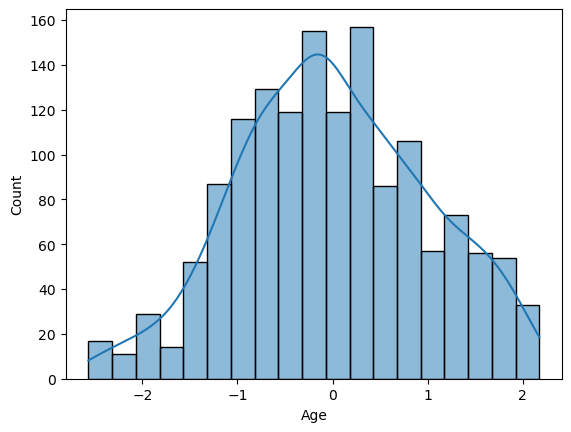

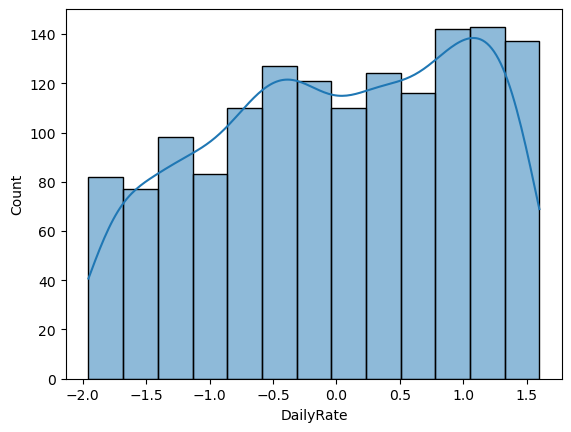

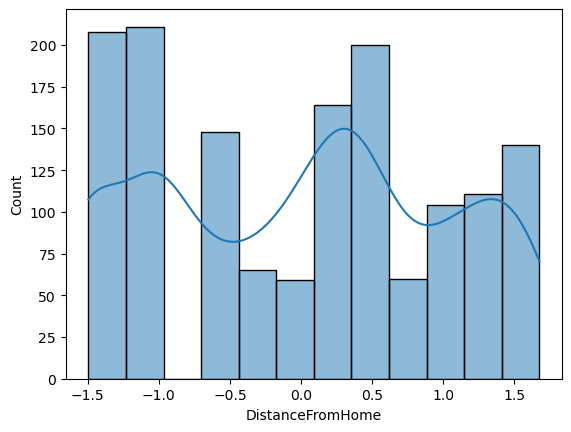

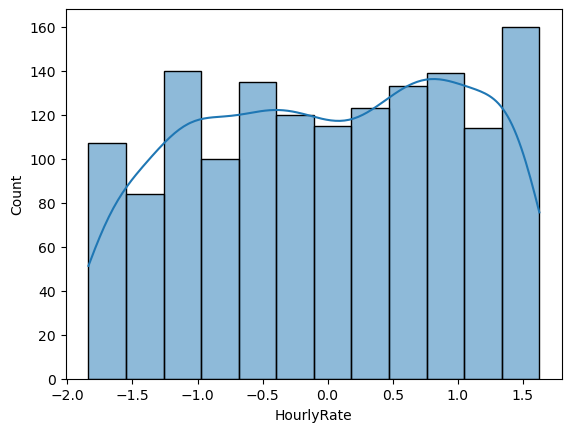

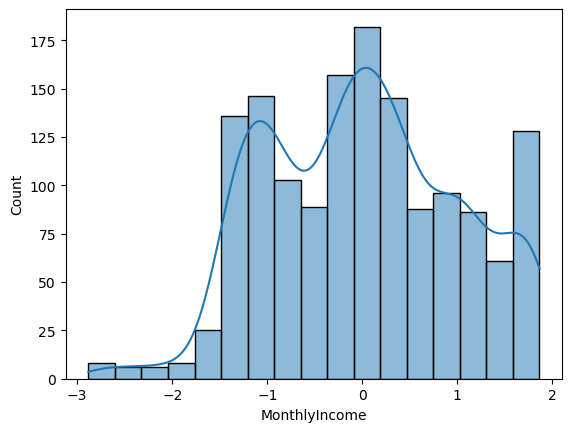

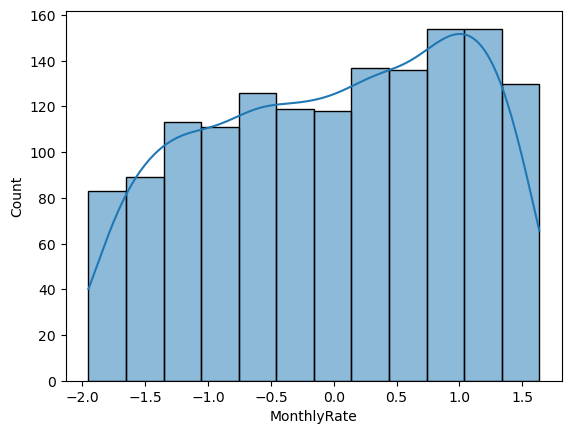

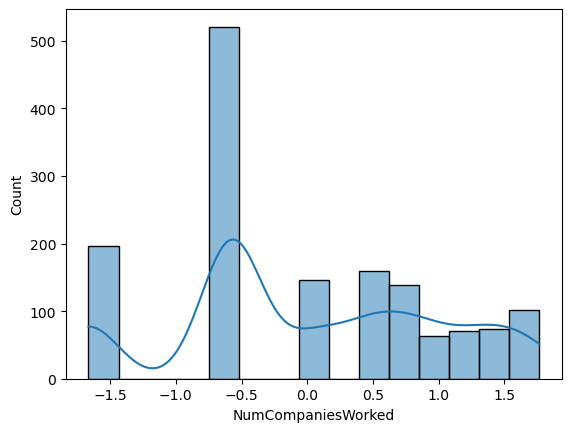

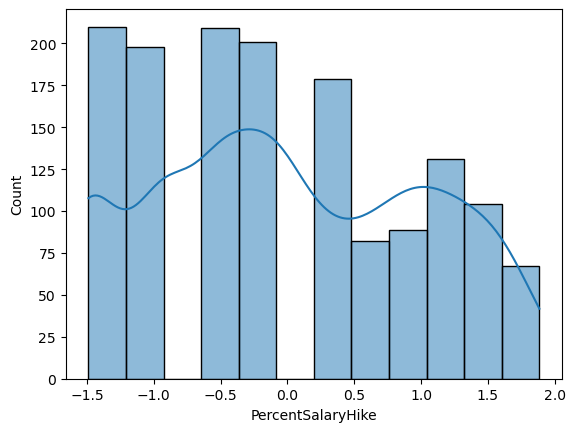

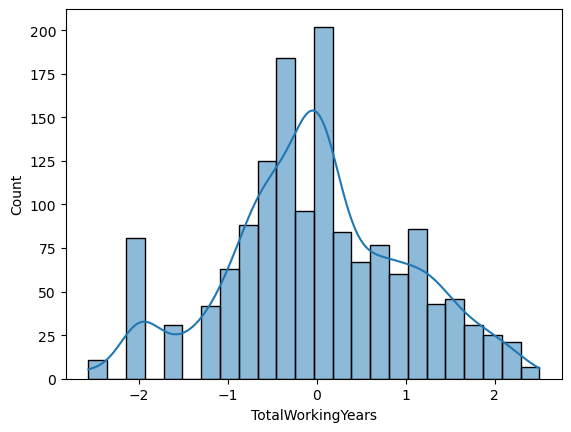

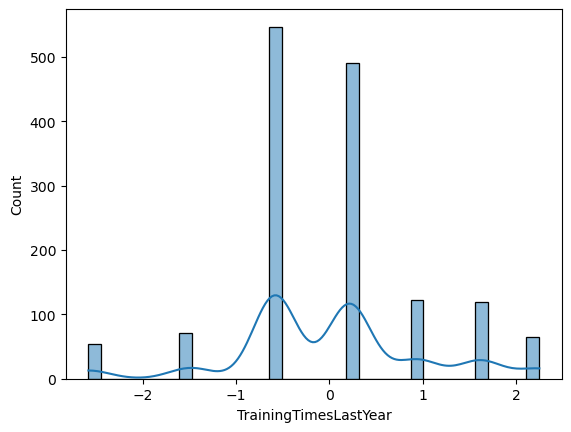

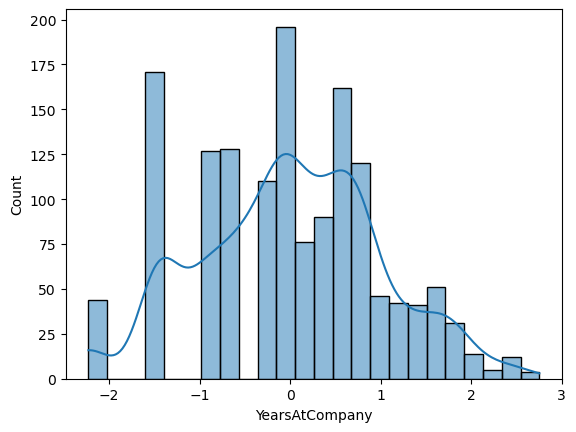

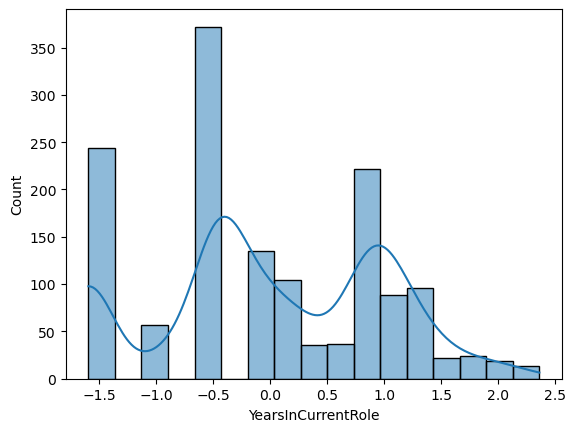

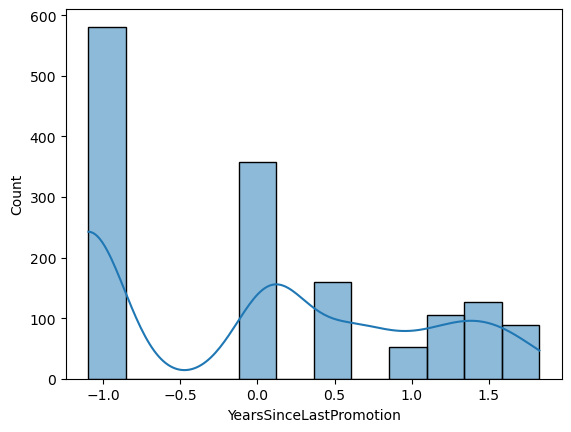

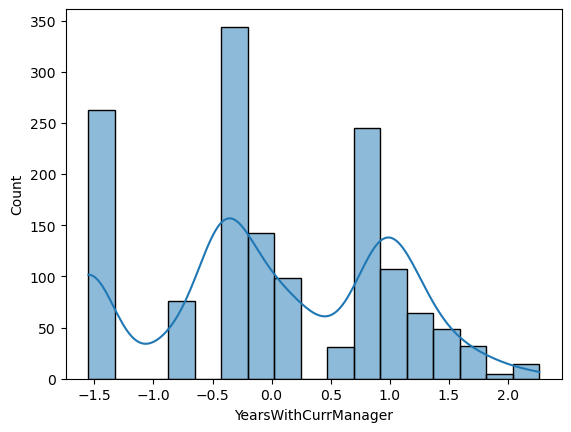

In [256]:
#Applying the power transformer to the numerical columns
power = PowerTransformer()
power_data[power_data.columns] = power.fit_transform(power_data[power_data.columns])

#Plottting the distribution of the numerical columns after applying the power transformer
for col in power_data.columns:
    plt.figure()
    sns.histplot(data=power_data[col], kde=True)

I think PowerScaler gives better results, so I will stick with it.

In [257]:
#Concatenating the categorical and numerical columns
final_data = pd.concat([cat_cols, power_data], axis=1)

<Axes: >

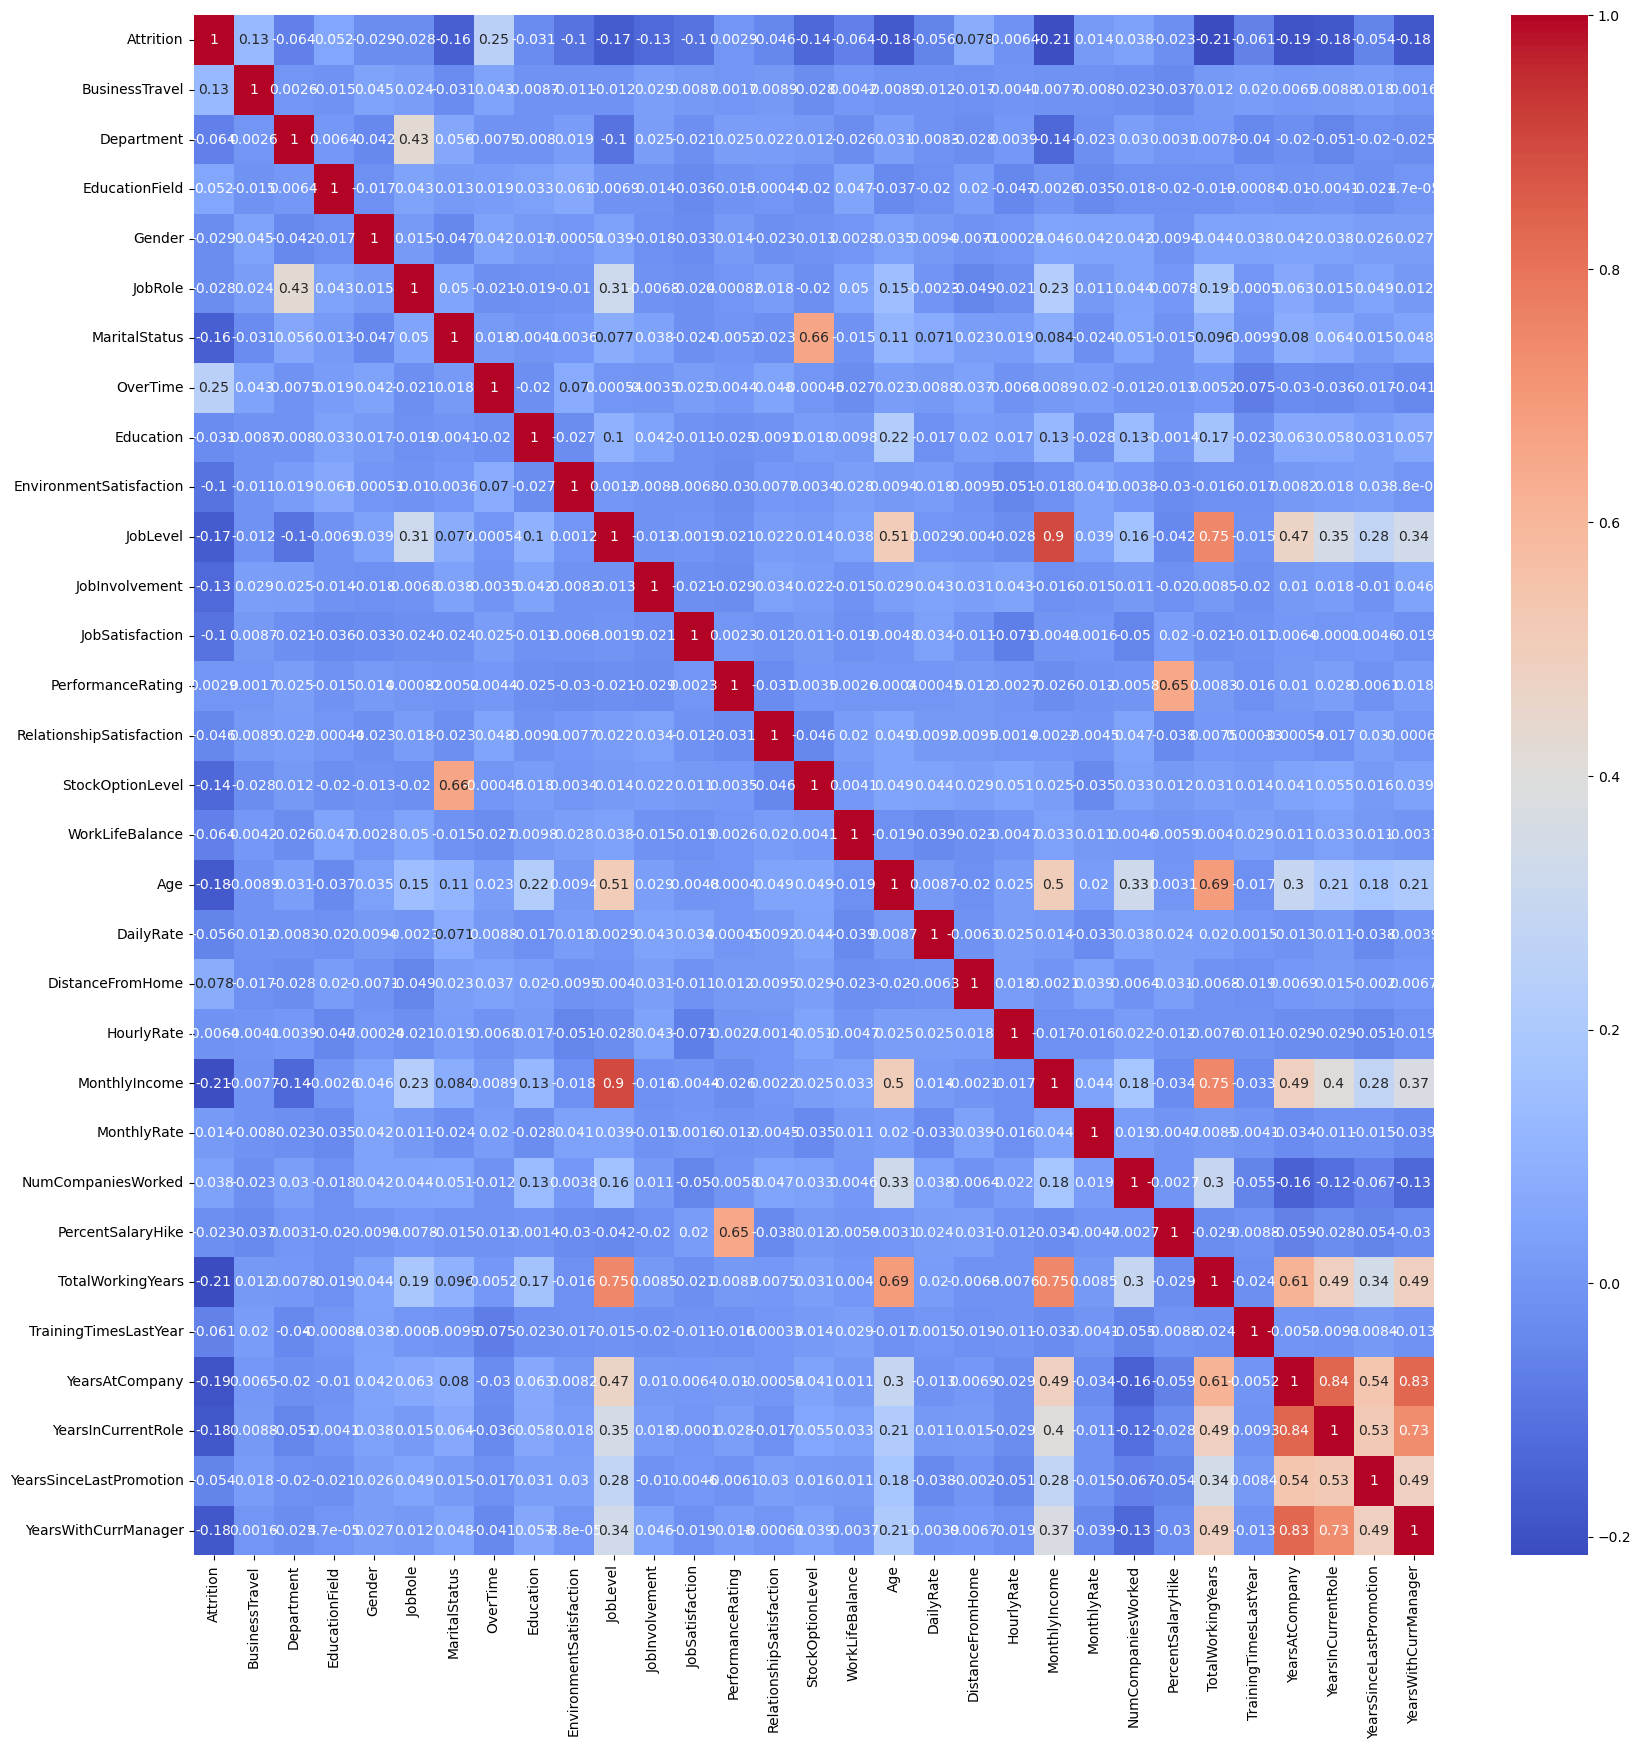

In [258]:
#Checking the correlation between the columns
plt.figure(figsize=(20, 20))
sns.heatmap(final_data.corr(), annot=True, cmap='coolwarm')

We see that there's high correlation between JobLevel and MonthlyIncome and then between YearsAtCompamy with YearsInCurrentRole and YearsWithCurrManager. For now, as all of them may play a role in the prediction, I will leave them, If the performance of the model can be improved by removing them, will do it later.

In [259]:
#Checking the relationship between the columns and the target column
final_data.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
BusinessTravel              0.127006
DistanceFromHome            0.078213
EducationField              0.051567
NumCompaniesWorked          0.037554
MonthlyRate                 0.014483
PerformanceRating           0.002889
HourlyRate                 -0.006390
PercentSalaryHike          -0.022524
JobRole                    -0.027930
Gender                     -0.029453
Education                  -0.031373
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.054479
DailyRate                  -0.055923
TrainingTimesLastYear      -0.061284
WorkLifeBalance            -0.063939
Department                 -0.063991
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
StockOptionLevel           -0.137145
MaritalStatus              -0.162070
JobLevel                   -0.169105
Age                        -0.175766
YearsInCurrentRole         -0.182921
Y

In [260]:
#Splitting the data into features and target
X = final_data.drop(columns='Attrition')
y = final_data['Attrition']

#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Testing and training the models

In [261]:
#Now, I will create a function to test different models to select the one that gives the best results and work with it.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

def model_test(models, X_train, y_train):
    results = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            'Model': str(model),
            'Accuracy': accuracy_score(y_test, y_pred),
            'AUC-ROC Score': roc_auc_score(y_test, y_pred)
        })
    # Plot confusion matrices
    plt.figure(figsize=(12, 34))
    for i, model_results in enumerate(results):
        plt.subplot(len(models), 1, i+1)
        plt.title(f'Confusion Matrix for {model_results["Model"]}')
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.xticks(rotation=45)
    return pd.DataFrame(results)

In [262]:
#Creating a list of models to test
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

models = [LogisticRegression(),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            ExtraTreesClassifier(),
            SVC(),
            GaussianNB(),
            GradientBoostingClassifier(),
            AdaBoostClassifier(),
            MLPClassifier(),
            GaussianProcessClassifier()]

Model  Accuracy  AUC-ROC Score
0          LogisticRegression()  0.863946       0.669222
1      DecisionTreeClassifier()  0.761905       0.608493
2      RandomForestClassifier()  0.840136       0.560298
3        ExtraTreesClassifier()  0.843537       0.570936
4                         SVC()  0.846939       0.538505
5                  GaussianNB()  0.789116       0.676372
6  GradientBoostingClassifier()  0.846939       0.572961
7          AdaBoostClassifier()  0.853741       0.637307
8               MLPClassifier()  0.860544       0.684426
9   GaussianProcessClassifier()  0.819728       0.539538

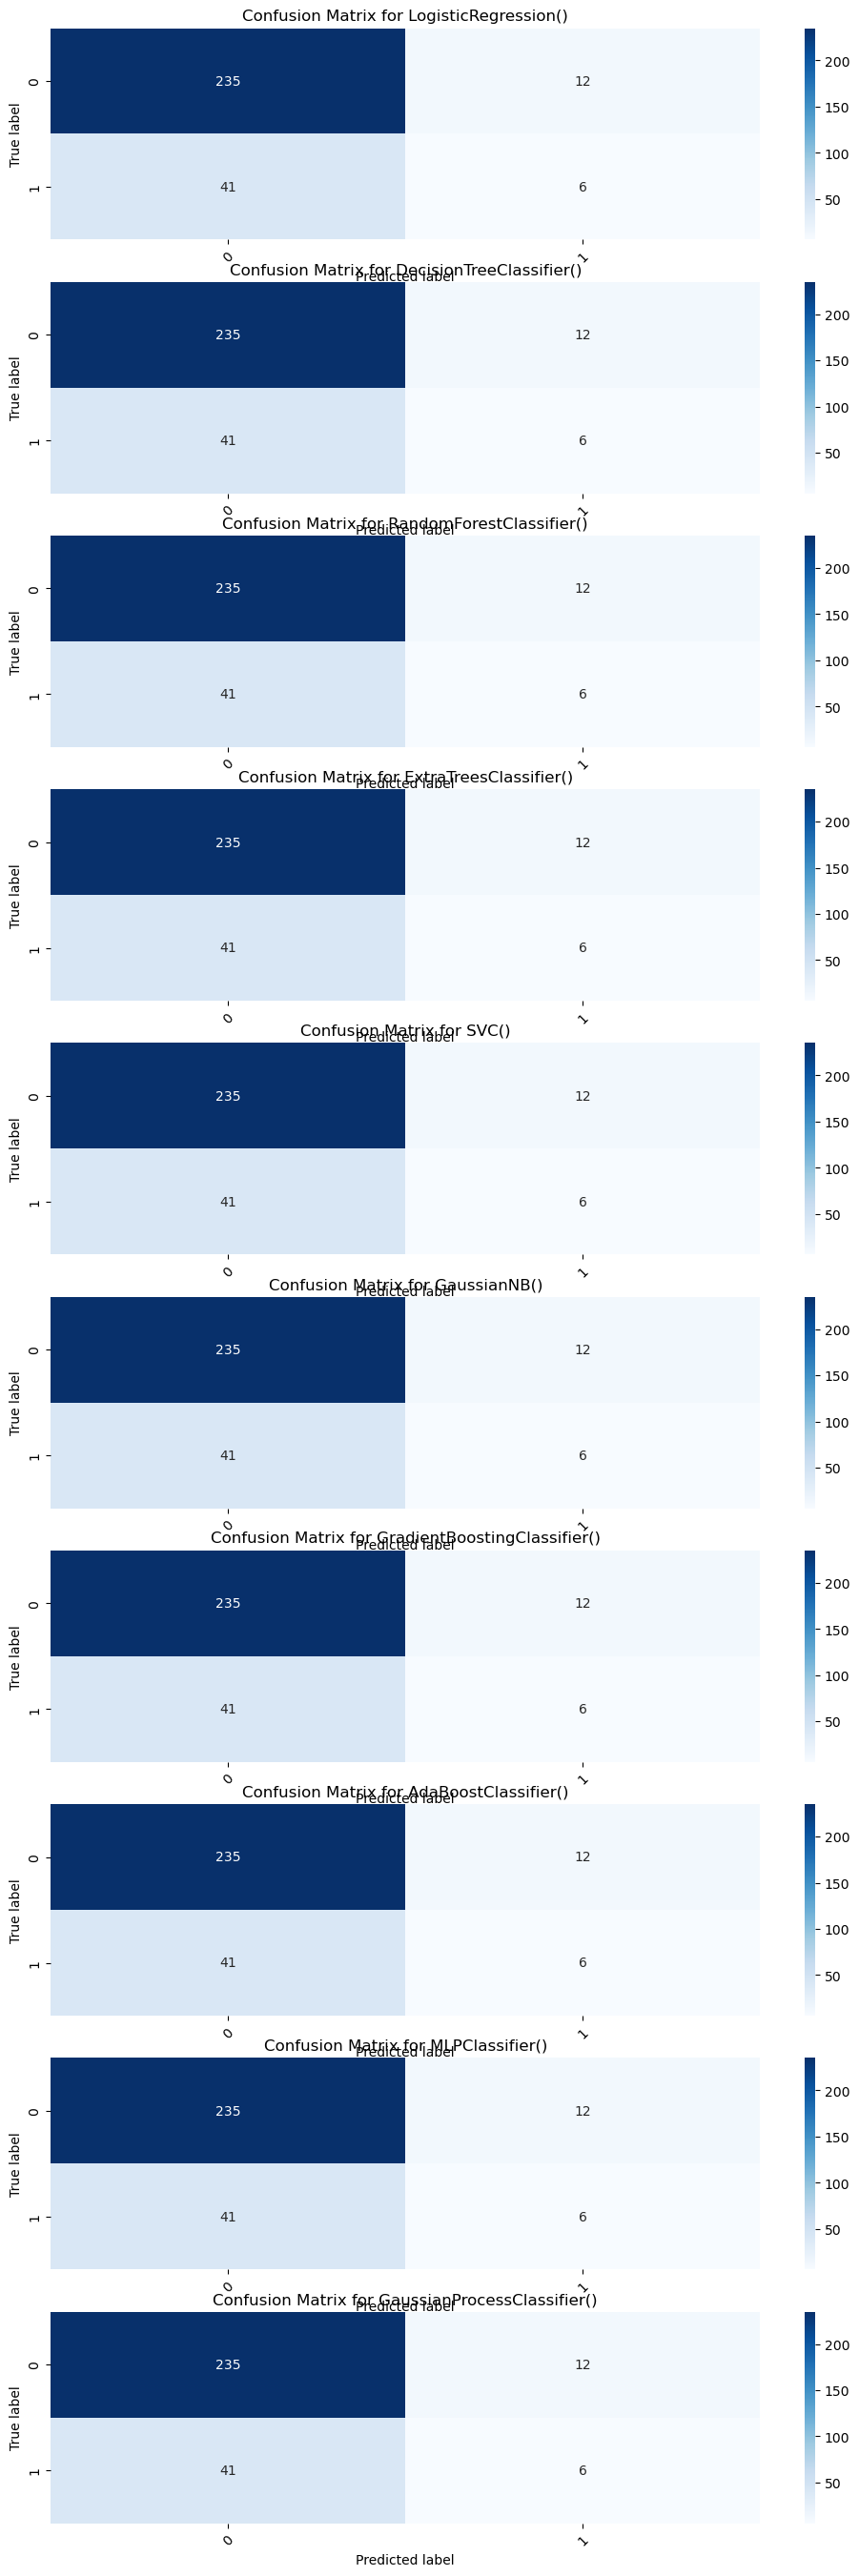

In [263]:
#Testing the models
model_test(models, X_train, y_train)

Looking at the results, we can see that Logistic Regression is giving really good results, with an accuracy of 0.90 and an AOC score of 0.69. Before trying to balance the data, I will try to work on that model and see what results we get after some tweaking and feature selection and engineering.

In [264]:
#Getting the best hyperparameters for the Logistic Regression model
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 1000, 10000]
}
grid = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
# Printing the best parameters
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'C': 0.1, 'max_iter': 100}
0.8775622069960332
LogisticRegression(C=0.1)


Accuracy: 0.8707482993197279
AUC-ROC Score: 0.6215866999741579
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.99      0.93       247
           1       0.80      0.26      0.39        47

    accuracy                           0.87       294
   macro avg       0.84      0.62      0.66       294
weighted avg       0.86      0.87      0.84       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

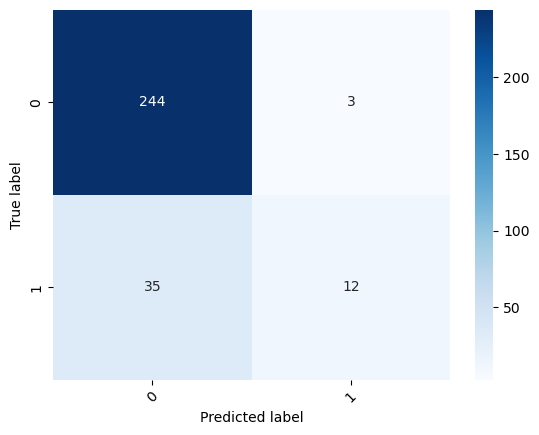

In [265]:
#Testing the model with the best hyperparameters
log_reg = LogisticRegression(C=0.1, max_iter=100)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

Precision AUC Score: 0.5871833839918947


Text(0.5, 1.0, 'Precision-Recall Curve')

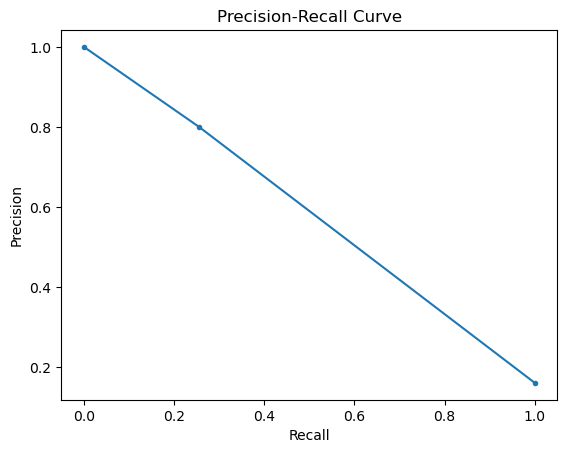

In [266]:
#As we have lost some score in the AUC-ROC score, I will try to check the Recall and Precision AOC scores
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, y_pred)
print('Precision AUC Score:', auc(recall, precision))

#Plotting the precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

In [267]:
#It is really similar to the AUC-ROC score. Now, I will get the feature importances of the model to do some feature selection.
#Getting the feature importances
feature_importances = pd.DataFrame(log_reg.coef_, columns=X.columns)
feature_importances = feature_importances.transpose()
feature_importances.columns = ['Importance']
feature_importances['Abs Importance'] = feature_importances['Importance'].abs()
feature_importances = feature_importances.sort_values(by='Abs Importance', ascending=False)
feature_importances

Importance  Abs Importance
OverTime                    1.184235        1.184235
BusinessTravel              0.691614        0.691614
Department                 -0.484019        0.484019
NumCompaniesWorked          0.467369        0.467369
JobInvolvement             -0.461050        0.461050
MonthlyIncome              -0.447058        0.447058
TotalWorkingYears          -0.437221        0.437221
EnvironmentSatisfaction    -0.371241        0.371241
MaritalStatus              -0.335590        0.335590
DistanceFromHome            0.332559        0.332559
WorkLifeBalance            -0.317733        0.317733
JobSatisfaction            -0.311724        0.311724
StockOptionLevel           -0.287978        0.287978
YearsWithCurrManager       -0.277975        0.277975
Age                        -0.275953        0.275953
YearsSinceLastPromotion     0.260157        0.260157
RelationshipSatisfaction   -0.220693        0.220693
Gender                     -0.213408        0.213408
YearsInCurrentRole         -0.191818        0.191818
JobLevel                    0.175358        0.175358
TrainingTimesLastYear      -0.168060        0.168060
PerformanceRating           0.155403        0.155403
DailyRate                  -0.140054        0.140054
PercentSalaryHike          -0.136529        0.136529
YearsAtCompany              0.097601        0.097601
EducationField              0.065960        0.065960
JobRole                     0.037306        0.037306
HourlyRate                 -0.029598        0.029598
MonthlyRate                 0.020531        0.020531
Education                   0.020205        0.020205

Accuracy: 0.8605442176870748
AUC-ROC Score: 0.5896718063571367
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.99      0.92       247
           1       0.75      0.19      0.31        47

    accuracy                           0.86       294
   macro avg       0.81      0.59      0.61       294
weighted avg       0.85      0.86      0.82       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

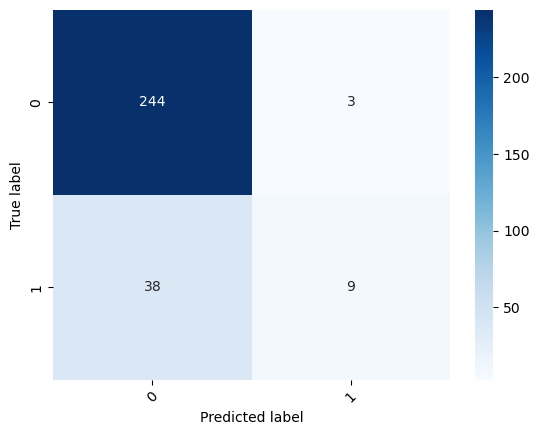

In [268]:
#Training the model with the selected features
X_train_selected = X_train[feature_importances.index[:10]]
X_test_selected = X_test[feature_importances.index[:10]]
log_reg.fit(X_train_selected, y_train)
y_pred = log_reg.predict(X_test_selected)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

In [269]:
#The model worsened by a lot. I will try to use VIF to check for multicollinearity and remove the columns that are causing it.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

feature        VIF
12         PerformanceRating  53.567958
9                   JobLevel  26.232453
15           WorkLifeBalance  15.590681
10            JobInvolvement  14.950834
7                  Education   9.253118
13  RelationshipSatisfaction   7.262368
8    EnvironmentSatisfaction   7.181556
11           JobSatisfaction   6.994407
26            YearsAtCompany   6.653122
20             MonthlyIncome   5.685681
0             BusinessTravel   5.179173
24         TotalWorkingYears   4.914978
5              MaritalStatus   4.671701
1                 Department   4.116796
27        YearsInCurrentRole   3.632268
14          StockOptionLevel   3.404263
29      YearsWithCurrManager   3.382537
4                    JobRole   3.351747
16                       Age   2.103193
2             EducationField   1.730390
3                     Gender   1.698115
28   YearsSinceLastPromotion   1.474698
6                   OverTime   1.434356
22        NumCompaniesWorked   1.431109
23         PercentSalaryHike   1.354368
19                HourlyRate   1.021402
17                 DailyRate   1.020838
21               MonthlyRate   1.019036
25     TrainingTimesLastYear   1.018889
18          DistanceFromHome   1.012584

Accuracy: 0.8741496598639455
AUC-ROC Score: 0.640839004220863
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.78      0.30      0.43        47

    accuracy                           0.87       294
   macro avg       0.83      0.64      0.68       294
weighted avg       0.86      0.87      0.85       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

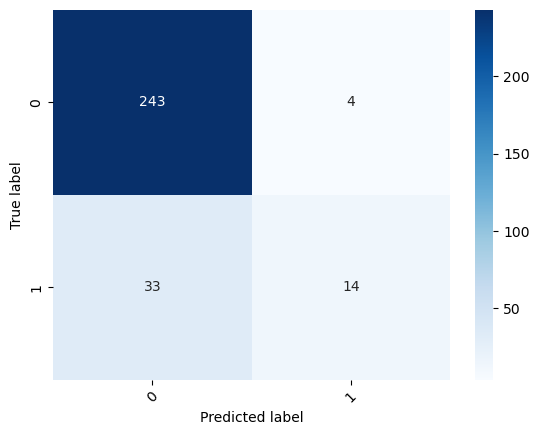

In [270]:
#Training the model without the columns that have multicollinearity
X_train_vif = X_train.drop(columns=['JobLevel', 'PerformanceRating', 'WorkLifeBalance', 'JobInvolvement', 'Education'])
X_test_vif = X_test.drop(columns=['JobLevel', 'PerformanceRating', 'WorkLifeBalance', 'JobInvolvement', 'Education'])
log_reg.fit(X_train_vif, y_train)
y_pred = log_reg.predict(X_test_vif)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)


Accuracy: 0.8571428571428571
AUC-ROC Score: 0.6221035403566199
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.62      0.28      0.38        47

    accuracy                           0.86       294
   macro avg       0.75      0.62      0.65       294
weighted avg       0.83      0.86      0.83       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

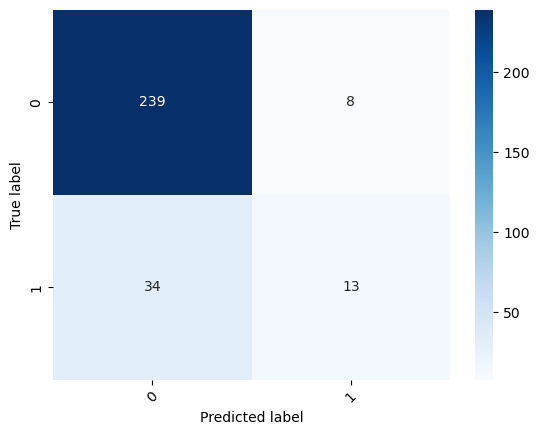

In [271]:
#Testing the model with the best hyperparameters
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(100,), max_iter=1000, solver='sgd')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

Precision AUC Score: 0.5056448111159357


Text(0.5, 1.0, 'Precision-Recall Curve')

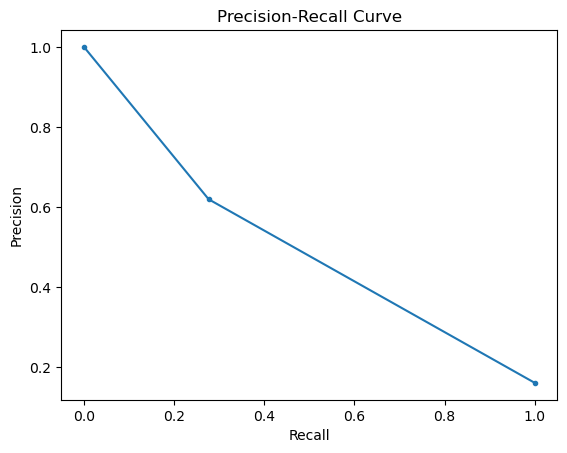

In [272]:
#Plotting the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
print('Precision AUC Score:', auc(recall, precision))
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

In [273]:
#To try and improve the model, I will remove the outliers, as they don't represent a big part of the dataset
from feature_engine.outliers import Winsorizer

# Replace 'num_cols.columns' with a list of column names
variables = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
             'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
             'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
             'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=variables)
X_train_outliers = winsorizer.fit_transform(X_train)
X_test_outliers = winsorizer.transform(X_test)

Accuracy: 0.8605442176870748
AUC-ROC Score: 0.641355844603325
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.32      0.42        47

    accuracy                           0.86       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

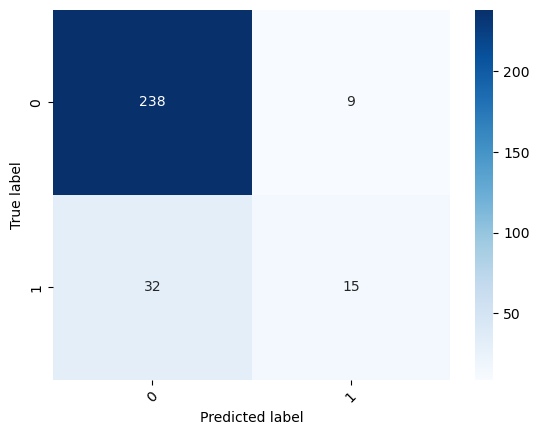

In [274]:
#Running the model with the outliers removed
mlp.fit(X_train_outliers, y_train)
y_pred = mlp.predict(X_test_outliers)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

Accuracy: 0.8231292517006803
AUC-ROC Score: 0.7138427082436043
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.87      0.89       247
           1       0.46      0.55      0.50        47

    accuracy                           0.82       294
   macro avg       0.68      0.71      0.70       294
weighted avg       0.84      0.82      0.83       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

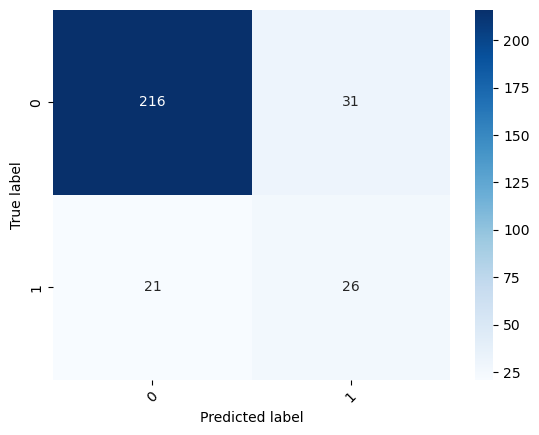

In [275]:
#By removing the outliers, the model did not improve. I will try now to balance the data using BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE

#Applying BorderlineSMOTE to balance the data
smote = BorderlineSMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_outliers, y_train)

#Running the model with the balanced data
mlp.fit(X_train_smote, y_train_smote)
y_pred = mlp.predict(X_test_outliers)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

Model  Accuracy  AUC-ROC Score
0          LogisticRegression()  0.806122       0.712335
1      DecisionTreeClassifier()  0.734694       0.566457
2      RandomForestClassifier()  0.823129       0.593247
3        ExtraTreesClassifier()  0.843537       0.605392
4                         SVC()  0.823129       0.696615
5                  GaussianNB()  0.724490       0.672366
6  GradientBoostingClassifier()  0.812925       0.630244
7          AdaBoostClassifier()  0.799320       0.716901
8               MLPClassifier()  0.823129       0.679387
9   GaussianProcessClassifier()  0.704082       0.642993

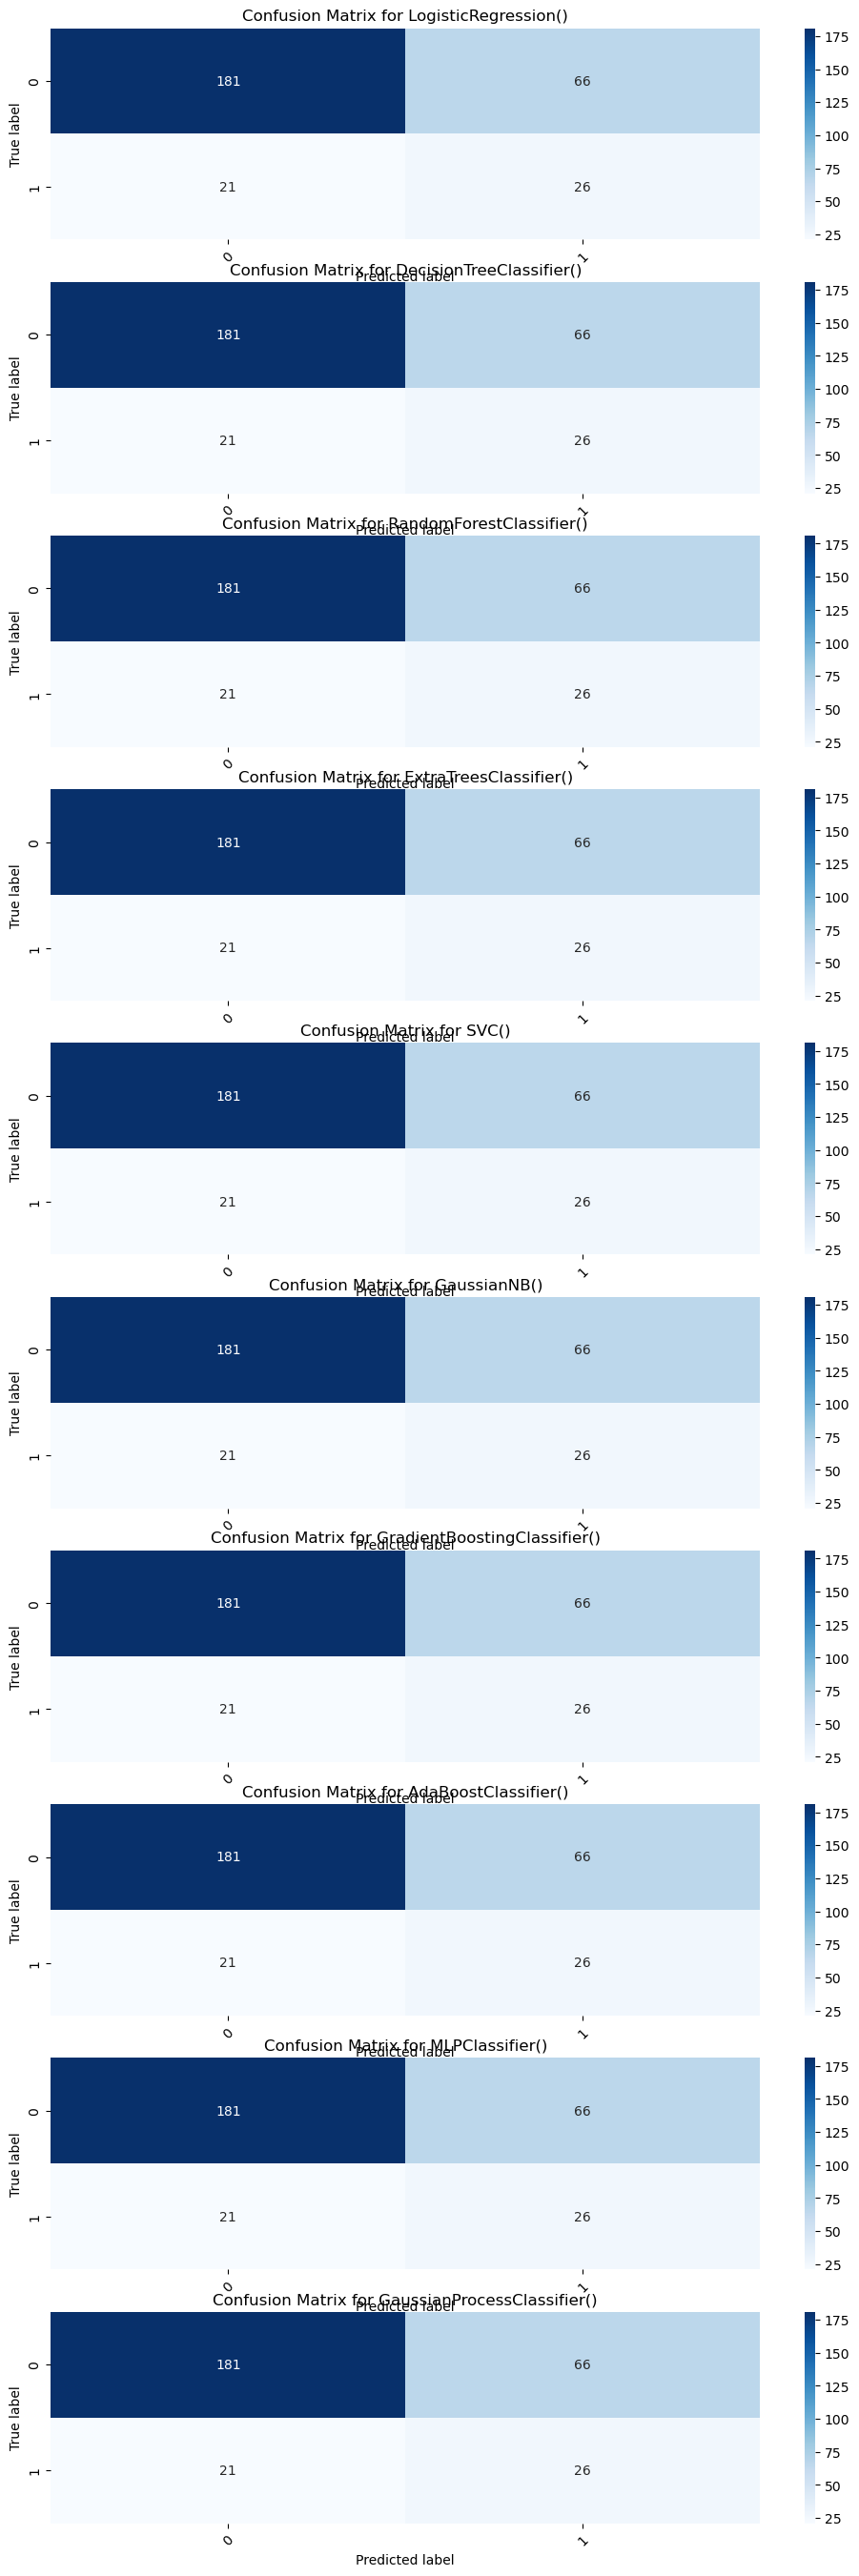

In [276]:
#Even though the precission of the model did not improve, the AUC-ROC score did. I will try to run the model testing function to check if there is a better model.
model_test(models, X_train_smote, y_train_smote)

The best overall model continues to be MLPClassifier. I will stick with it.

Accuracy: 0.8469387755102041
AUC-ROC Score: 0.7366267551037988
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.90      0.91       247
           1       0.52      0.57      0.55        47

    accuracy                           0.85       294
   macro avg       0.72      0.74      0.73       294
weighted avg       0.85      0.85      0.85       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

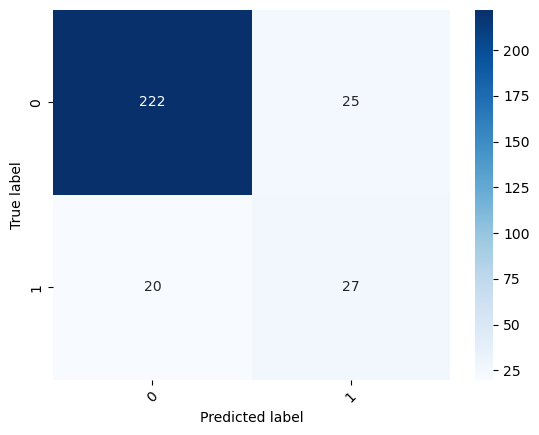

In [277]:
#Training the model with the best hyperparameters
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(200,), max_iter=1000, solver='adam')
mlp.fit(X_train_smote, y_train_smote)
y_pred = mlp.predict(X_test_outliers)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

Accuracy: 0.7993197278911565
AUC-ROC Score: 0.7169006805065036
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.84      0.88       247
           1       0.41      0.60      0.49        47

    accuracy                           0.80       294
   macro avg       0.66      0.72      0.68       294
weighted avg       0.84      0.80      0.81       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

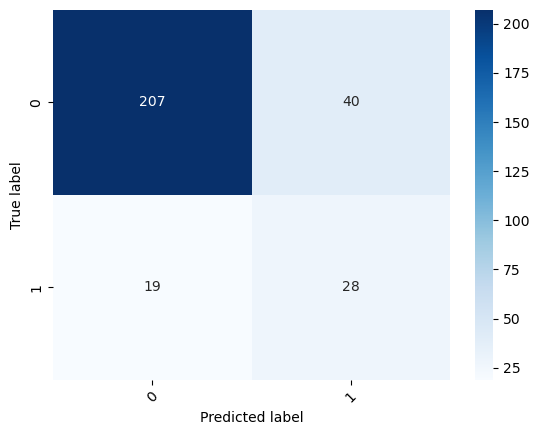

In [278]:
#Now, I will try the seconde best overall model, AdaBoostClassifier, to see if it gives better results
model = AdaBoostClassifier()
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_outliers)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

In [279]:
#Finding the best hyperparameters for AdaBoostClassifier
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1]
}
grid = GridSearchCV(AdaBoostClassifier(), param_grid=params, cv=5)
grid.fit(X_train_smote, y_train_smote)
# Printing the best parameters
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.5, 'n_estimators': 100}
0.8712754610293645


Accuracy: 0.8231292517006803
AUC-ROC Score: 0.7052287018692394
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.88      0.89       247
           1       0.45      0.53      0.49        47

    accuracy                           0.82       294
   macro avg       0.68      0.71      0.69       294
weighted avg       0.84      0.82      0.83       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

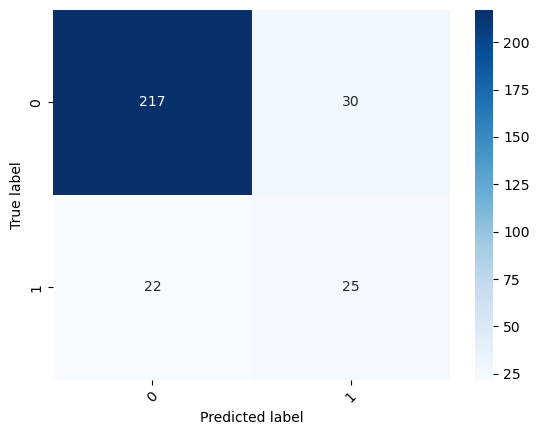

In [280]:
#Training the model with the best hyperparameters
model = AdaBoostClassifier(learning_rate=0.5, n_estimators=200)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_outliers)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

In [281]:
#Running the model using the classification report for imbalance classification
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.88      0.53      0.89      0.68      0.48       247
          1       0.45      0.53      0.88      0.49      0.68      0.45        47

avg / total       0.84      0.82      0.59      0.83      0.68      0.48       294



After running the different models and seeing no further improvement in the prediction of Attrition values of 'Yes', we will use the last model trained. It is performing well, with an accuracy of 0.83 and good recall and precission values. We are also considering the score in the AUROC of 0.72, as it is showing that the model can differentiate between the classes and is working as intended.

## Further Working on the dataset

Accuracy: 0.8231292517006803
AUC-ROC Score: 0.6104746317512275
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.92      0.90       247
           1       0.42      0.30      0.35        47

    accuracy                           0.82       294
   macro avg       0.65      0.61      0.62       294
weighted avg       0.80      0.82      0.81       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

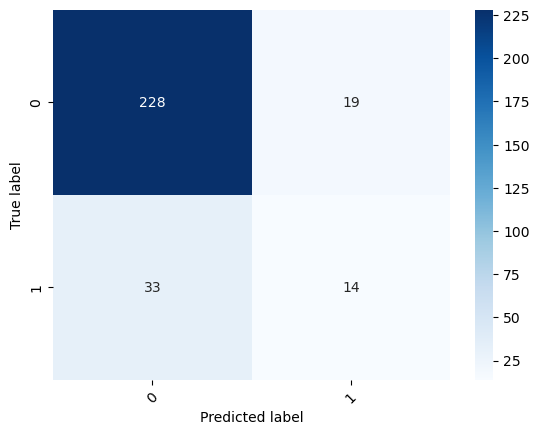

In [282]:
#I will apply weights to the model, to see if we get better recall in class 1, as it is the class that we are most interested in
#To get the weights for the classes I will the following formula: n_samples / (n_classes * class_counts)
weight_dict = {0: 0.59, 1: 3.12}
model = RandomForestClassifier(class_weight=weight_dict)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_outliers)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)



In [283]:
#Getting the best hyperparameters for the RandomForestClassifier model
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}
grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train_smote, y_train_smote)
# Printing the best parameters
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.9412324102036882
RandomForestClassifier(bootstrap=False, max_depth=50, max_features='log2',
                       n_estimators=200)


Accuracy: 0.8231292517006803
AUC-ROC Score: 0.5846326126281334
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.94      0.90       247
           1       0.41      0.23      0.30        47

    accuracy                           0.82       294
   macro avg       0.64      0.58      0.60       294
weighted avg       0.79      0.82      0.80       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

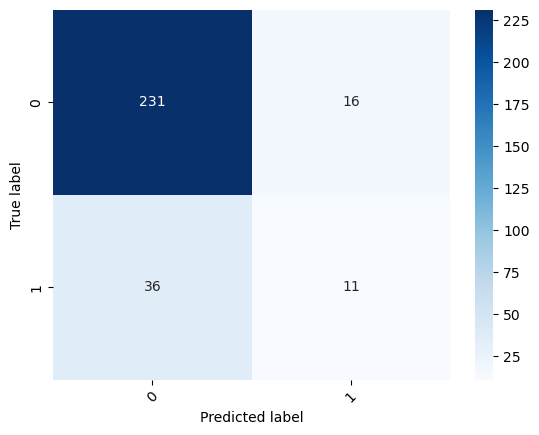

In [284]:
#Running the model with the best hyperparameters
weight_dict = {0: 0.59, 1: 3.12}
model = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=24, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=200, class_weight=weight_dict)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_outliers)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

Accuracy: 0.6054421768707483
AUC-ROC Score: 0.6962701352399001
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.56      0.71       247
           1       0.27      0.83      0.40        47

    accuracy                           0.61       294
   macro avg       0.61      0.70      0.55       294
weighted avg       0.84      0.61      0.66       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

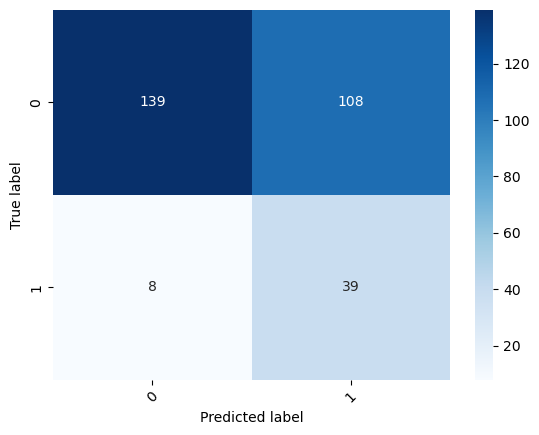

In [285]:
#Trying now a Logistic Regression model with the weights
weight_dict = {0: 0.59, 1: 3.50}
model = LogisticRegression(class_weight=weight_dict)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_outliers)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

Accuracy: 0.8197278911564626
AUC-ROC Score: 0.5998363338788871
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.92      0.90       247
           1       0.41      0.28      0.33        47

    accuracy                           0.82       294
   macro avg       0.64      0.60      0.61       294
weighted avg       0.80      0.82      0.81       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

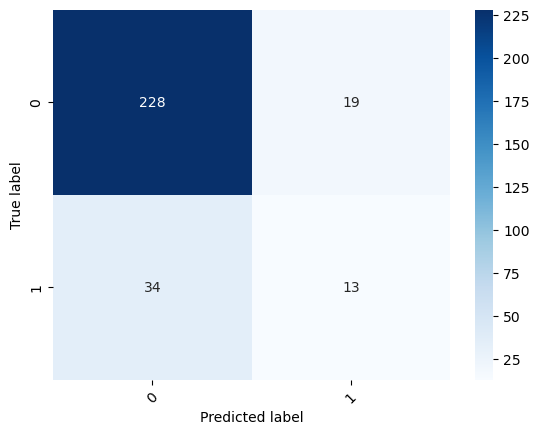

In [286]:
#Using BalancedRandomForestClassifier to see if it gives better results
from imblearn.ensemble import BalancedRandomForestClassifier
model = BalancedRandomForestClassifier(sampling_strategy='majority', n_estimators=200, max_depth=24, max_features='log2', min_samples_leaf=1, min_samples_split=2, criterion='gini')
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_outliers)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

In [287]:
#Finding the best hyperparameters for BalancedRandomForestClassifier
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}
grid = GridSearchCV(BalancedRandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train_smote, y_train_smote)
# Printing the best parameters
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9412246996080447
BalancedRandomForestClassifier(bootstrap=False, max_depth=100,
                               max_features='log2')


Accuracy: 0.8231292517006803
AUC-ROC Score: 0.567404599879404
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90       247
           1       0.39      0.19      0.26        47

    accuracy                           0.82       294
   macro avg       0.63      0.57      0.58       294
weighted avg       0.78      0.82      0.80       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

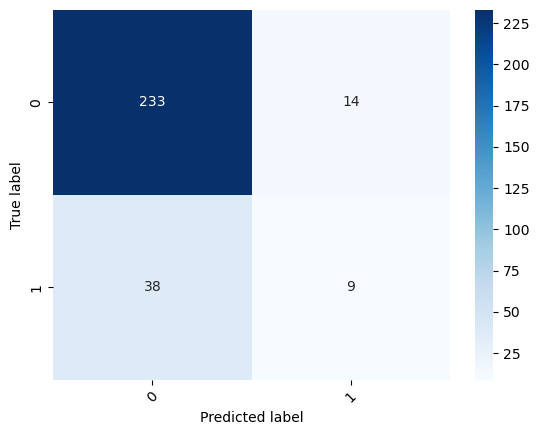

In [288]:
#Running the model with the best hyperparameters
model = BalancedRandomForestClassifier(bootstrap=False, criterion='gini', max_depth=50, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=200)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_outliers)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

Accuracy: 0.8163265306122449
AUC-ROC Score: 0.5633560168834525
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90       247
           1       0.36      0.19      0.25        47

    accuracy                           0.82       294
   macro avg       0.61      0.56      0.57       294
weighted avg       0.78      0.82      0.79       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

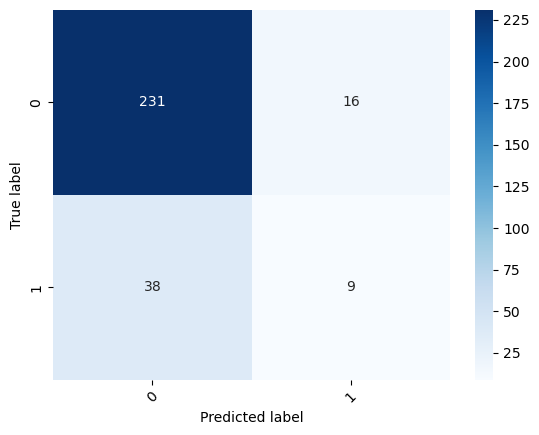

In [289]:
#Running the model with the best hyperparameters
model = BalancedRandomForestClassifier(sampling_strategy='all', bootstrap=False, criterion='gini', max_depth=50, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=200)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_outliers)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

In [290]:
#Using the BalancedRandomForestClassifier model to get the feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

Importance
StockOptionLevel            0.060149
MonthlyIncome               0.057138
Age                         0.056940
JobLevel                    0.049886
YearsWithCurrManager        0.047526
TotalWorkingYears           0.046367
NumCompaniesWorked          0.045487
YearsAtCompany              0.044676
JobRole                     0.043232
DistanceFromHome            0.039971
EnvironmentSatisfaction     0.037706
YearsInCurrentRole          0.036792
JobInvolvement              0.036541
MaritalStatus               0.036075
WorkLifeBalance             0.035256
JobSatisfaction             0.034651
HourlyRate                  0.033590
DailyRate                   0.033430
MonthlyRate                 0.030187
PercentSalaryHike           0.029350
TrainingTimesLastYear       0.026604
RelationshipSatisfaction    0.024624
YearsSinceLastPromotion     0.023206
Education                   0.020083
EducationField              0.015706
Department                  0.015582
Gender                      0.013622
OverTime                    0.011806
BusinessTravel              0.009707
PerformanceRating           0.004110

Accuracy: 0.6768707482993197
AUC-ROC Score: 0.6181841674562839
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.70      0.79       247
           1       0.26      0.53      0.34        47

    accuracy                           0.68       294
   macro avg       0.57      0.62      0.57       294
weighted avg       0.79      0.68      0.72       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

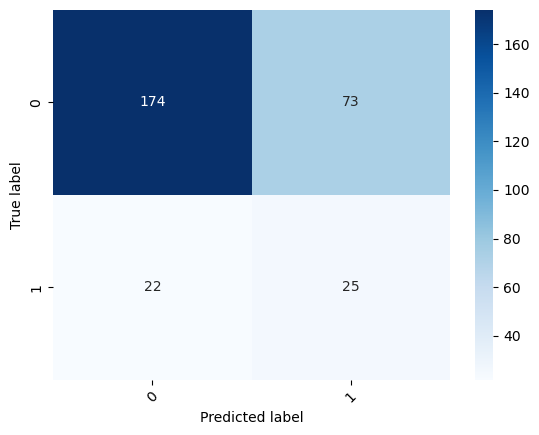

In [291]:
#Training the model with the 5 more important features
X_train_selected = X_train[feature_importances.index[:15]]
X_test_selected = X_test[feature_importances.index[:15]]
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

Accuracy: 0.7585034013605442
AUC-ROC Score: 0.7442932207769833
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.77      0.84       247
           1       0.37      0.72      0.49        47

    accuracy                           0.76       294
   macro avg       0.65      0.74      0.67       294
weighted avg       0.85      0.76      0.79       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

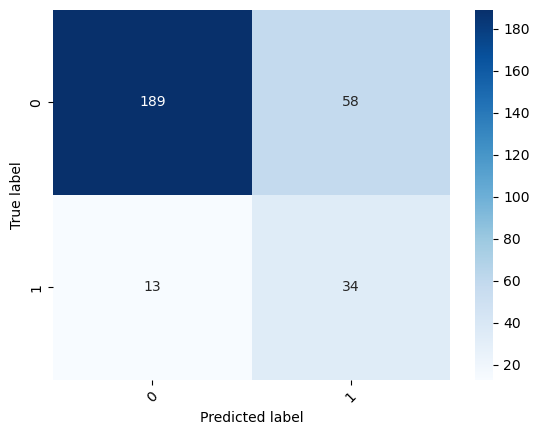

In [292]:
#Testing the model without SMOTE
model = BalancedRandomForestClassifier(sampling_strategy='majority', bootstrap=False, criterion='gini', max_depth=50, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=400)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

In [293]:
#Getting the feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

Importance
MonthlyIncome               0.075200
Age                         0.064402
TotalWorkingYears           0.052704
DailyRate                   0.051096
YearsAtCompany              0.047050
HourlyRate                  0.046701
MonthlyRate                 0.046294
DistanceFromHome            0.045174
OverTime                    0.044791
YearsWithCurrManager        0.041664
NumCompaniesWorked          0.037748
YearsInCurrentRole          0.035074
JobRole                     0.034014
StockOptionLevel            0.033674
PercentSalaryHike           0.033594
JobLevel                    0.028673
EnvironmentSatisfaction     0.027660
JobSatisfaction             0.026849
YearsSinceLastPromotion     0.024676
WorkLifeBalance             0.023927
RelationshipSatisfaction    0.023599
TrainingTimesLastYear       0.023129
MaritalStatus               0.022590
JobInvolvement              0.022472
Education                   0.020994
EducationField              0.019341
BusinessTravel              0.018061
Department                  0.014949
Gender                      0.009594
PerformanceRating           0.004304

Accuracy: 0.7653061224489796
AUC-ROC Score: 0.7397277973985701
AUC-PR Score: 0.3961151289164852
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.78      0.70      0.85      0.74      0.55       247
          1       0.38      0.70      0.78      0.49      0.74      0.54        47

avg / total       0.84      0.77      0.71      0.79      0.74      0.55       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

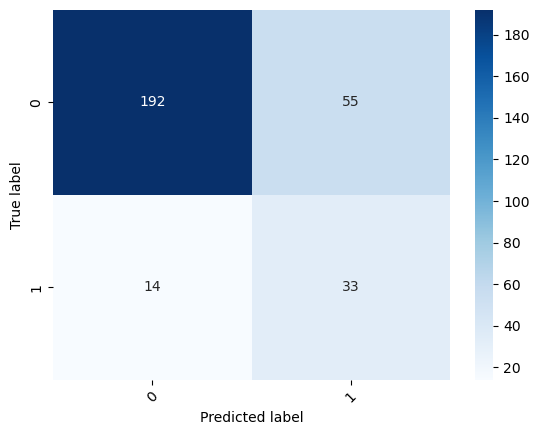

In [294]:
#Training the model with the 20 more important features
X_train_selected = X_train[feature_importances.index[:20]]
X_test_selected = X_test[feature_importances.index[:20]]
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
#Printing the results
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_selected)[:, 1])
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)
print(classification_report_imbalanced(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

Accuracy: 0.7210884353741497
AUC-ROC Score: 0.7478680334223446
AUC-PR Score: 0.4525537509591876
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.71      0.79      0.81      0.75      0.55       247
          1       0.34      0.79      0.71      0.47      0.75      0.56        47

avg / total       0.85      0.72      0.77      0.76      0.75      0.55       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

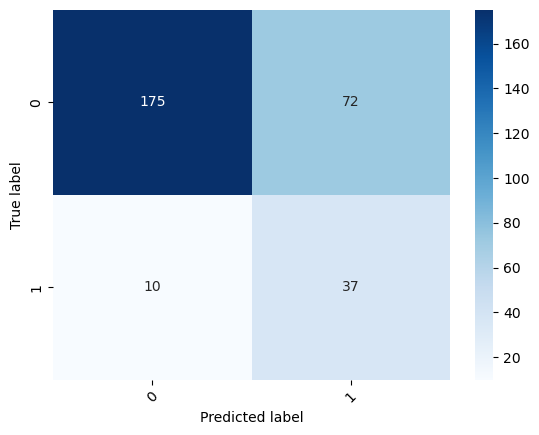

In [295]:
#Now I will try to use EasyEnsembleClassifier to see if it gives better results
from imblearn.ensemble import EasyEnsembleClassifier
model = EasyEnsembleClassifier(n_estimators=200)
model.fit(X_train_outliers, y_train)
y_pred = model.predict(X_test_outliers)
#Printing the results
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)
print(classification_report_imbalanced(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

In [296]:
#Finding the best hyperparameters for EasyEnsembleClassifier
params = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
}
grid = GridSearchCV(EasyEnsembleClassifier(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
# Printing the best parameters
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)



{'n_estimators': 200}
0.7015759105661739
EasyEnsembleClassifier(n_estimators=200)


AUC-ROC Score: 0.7331811525540529
AUC-PR Score: 0.40765780961939835
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.70      0.77      0.80      0.73      0.53       247
          1       0.33      0.77      0.70      0.46      0.73      0.54        47

avg / total       0.84      0.71      0.76      0.75      0.73      0.53       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

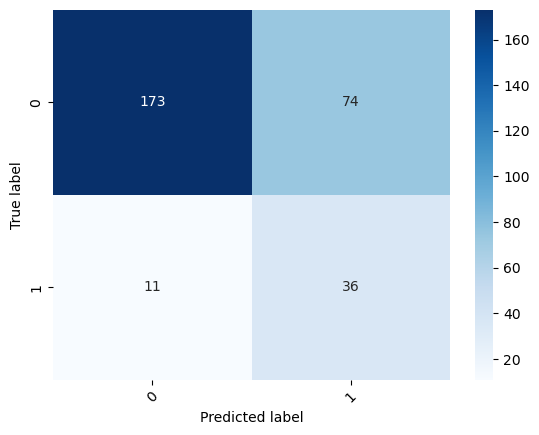

In [297]:
#Training the model with the best hyperparameters and the feature selection
model = EasyEnsembleClassifier(n_estimators=50, sampling_strategy='majority')
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

#Printing the results
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_selected)[:, 1])
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)
print(classification_report_imbalanced(y_test, y_pred))

#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

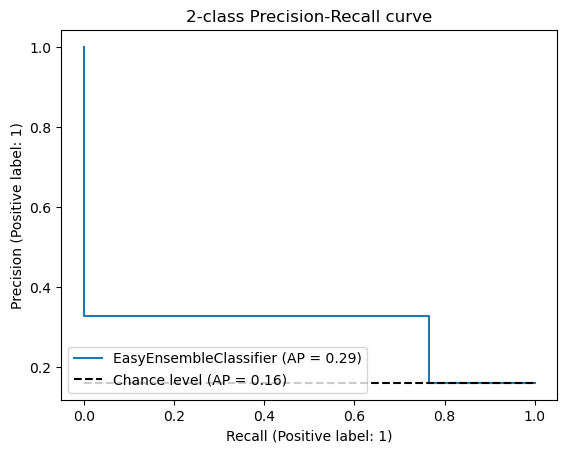

In [298]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred, name="EasyEnsembleClassifier", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Accuracy: 0.7585034013605442
AUC-ROC Score: 0.7442932207769833
AUC-PR Score: 0.40691424873311466
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.77      0.72      0.84      0.74      0.56       247
          1       0.37      0.72      0.77      0.49      0.74      0.55        47

avg / total       0.85      0.76      0.73      0.79      0.74      0.56       294



(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

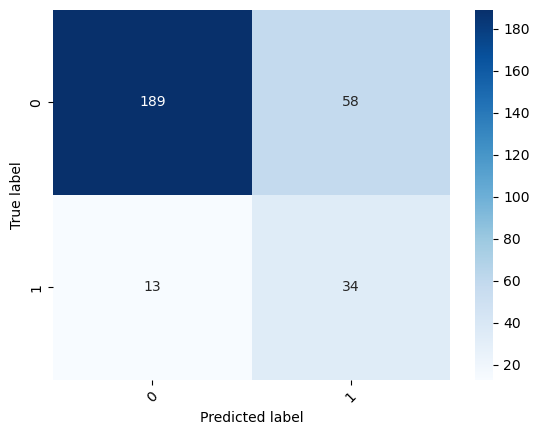

In [299]:
#Running BalancedRandomForestClassifier with the best hyperparameters and the data with no outliers
model = BalancedRandomForestClassifier(sampling_strategy='majority', bootstrap=False, criterion='gini', max_depth=50, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=400)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#Printing the results
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)
print(classification_report_imbalanced(y_test, y_pred))
#Plotting the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(rotation=45)

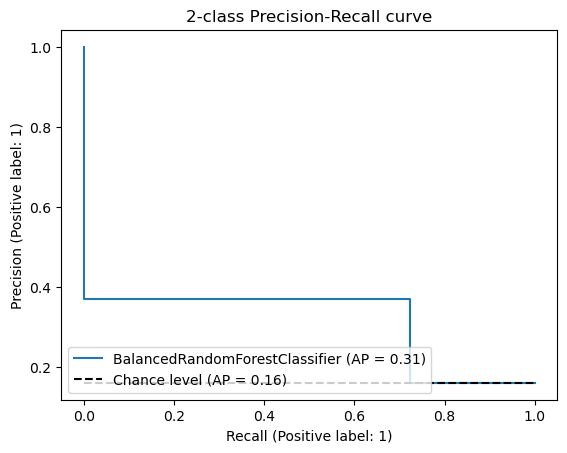

In [300]:
display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred, name="BalancedRandomForestClassifier", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

After some research, we have found that, prioritizing our target, Possitive Attrition, we loose some accuracy, but we can get better results at predicting attrition, because, of 10 employees reviewed by the model, we can safely say for the majority of them if their attrition will be positive or negative, and because of that, we can take actions before the employees start showing signs of that attritions and the turnovers start.

To get to this point, we have put more importance into giving the possitive class the weight needed. After running some models, the results were not as good as we expected, but, after trying the balanced models from Imblearn, we've got the results we were searching for, having the best results with the boosting ensemble of EasyEnsembleClassifier.

We also used the 20 most important features for the model, giving us the best results overall. The AUROC score is also good, portraying a good fitting and the ability of the model of differentiating the classes.

## Checking for overfitting.

First, I will start by using cross-validation to check if theres any discrepancies between the results.

In [301]:
#Running cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.69915254 0.76170213 0.74468085 0.76170213 0.8       ]
0.753447529751172


The cross validation shows a little bit of discrepancy, but inside the expected, so we will move to the next step, in this case, we will plot the learning curve of the model. 

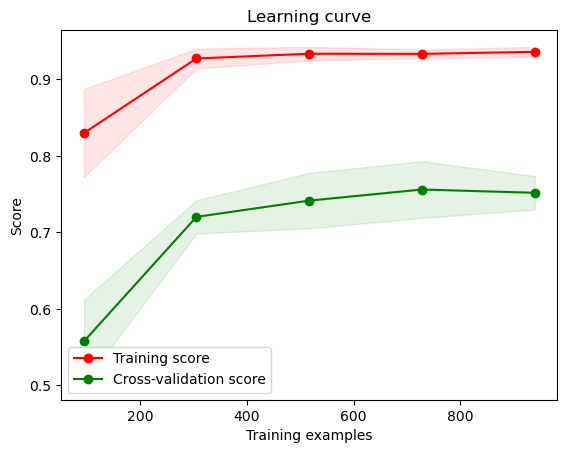

In [302]:
#Plotting the learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend(loc='best')

Again, as we can see from the plot, the training score maintains stable values, while the cross-validation score improves.

## Results and Findings

### Analysis Findings

After the analysis, we have found the following:

- The main factors that are causing attrition to our employees are:

    - Employees that rarely travel.

    - The R&D department suffers more attrition than the other departments.

    - Employees that whose education fields are Life Sciences and Medical.

    - The roles at the bottom, as sales executive, research scientist and laboratory technician.

    - Employees that work overtime

    - More attrition in single males than in the rest.

- From those factors, we can say that, employees with low pay rates, that are working overtime and are not travelling as the rest of their colleagues, suffer more from attrition. Sales executives may suffer more from it because the pressure on target achievements and lack of improvement and promotion.

- During the deep analysis using Tableau, we will get more information and prepare a dashboard to show to management and the HR directives, so the company can decide the next steps.


### Model Performance

As the data that we have is imbalanced, we had to use different methods to get the results we wanted. For that, we finally used EasyEnsembleClassifier to train it balancing the data automatically.

The model is putting the recall of positive values before the precission, but our intention is to avoid turnovers, so it is best to maybe misrepresent the negative attrition of an employee as positive if it gives us an advantage in dealing with it in the greater scale.

We can say that the model will perform as expected in finding the employees that will develop attrition and we can use the data to improve the areas that are causing that attrition and avoid loosing good employees to turnovers.

### Next Steps

The next steps will be to create a dashboard using BI tools to explore the data and get more deep insights on it, try to get more information about employees with attrition to lower the class imbalance of the data and further improve the model.